In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#All the neccesary library being inputed

In [242]:
# Load the application data into a pandas DataFrame
data = pd.read_csv('application_data.csv')

# Display the first few rows of the DataFrame to inspect the data
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [243]:
# Calculate the percentage of null values in each column
null_percentages = (data.isnull().sum() / len(data)) * 100

# Identify columns with a high percentage of null values (greater than 30%)
high_null_columns = null_percentages[null_percentages > 30]

# Count the number of columns with a high percentage of null values
high_null_columns.value_counts().sum()

50

In [244]:
# Drop the columns with a high percentage of null values from the DataFrame
data = data.drop(columns=high_null_columns.index)

In [245]:
# Display the shape (number of rows and columns) of the DataFrame after dropping columns
data.shape

(307511, 72)

In [246]:
# Display a concise summary of the DataFrame, including column names, data types, and non-null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [247]:
# Convert 'DAYS_BIRTH' column to string and remove leading '-' characters (if any).
data['DAYS_BIRTH'] = data['DAYS_BIRTH'].astype(str).str.strip('-')

# Convert 'DAYS_BIRTH' column to float for numerical operations.
data['DAYS_BIRTH'] = data.DAYS_BIRTH.astype(float)


In [248]:
# Calculate age in years and create a new 'Age' column
data['Age'] = data['DAYS_BIRTH'] / 365.25
# We divide by 365.25 to account for leap years and get a more accurate age
data.Age.describe()

count    307511.000000
mean         43.906900
std          11.947950
min          20.503765
25%          33.984942
50%          43.121150
75%          53.886379
max          69.073238
Name: Age, dtype: float64

In [249]:
# Display the first 5 rows and columns from index 10 to 19 (exclusive) of the DataFrame.
data.iloc[:5, 10:20]

,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION
0,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461.0,-637,-3648.0
1,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,-1188,-1186.0
2,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046.0,-225,-4260.0
3,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005.0,-3039,-9833.0
4,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932.0,-3038,-4311.0


In [250]:
# Create a new DataFrame 'cata_df' by selecting specific columns related to categorical features.
cata_df = data[['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE']]

In [251]:
# Display the first few rows of the 'cata_df' DataFrame to inspect the categorical data.
cata_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE
0,1,Cash loans,M,N,Y,Working
1,0,Cash loans,F,N,N,State servant
2,0,Revolving loans,M,Y,Y,Working
3,0,Cash loans,F,N,Y,Working
4,0,Cash loans,M,N,Y,Working


In [252]:
# Create a new DataFrame 'num_df' by selecting columns related to numerical features.
num_df = data[['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'Age', 'DAYS_EMPLOYED']]

In [253]:
# Display the first few rows of the 'num_df' DataFrame to inspect the numerical data.
num_df.head()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,Age,DAYS_EMPLOYED
0,1,202500.0,406597.5,24700.5,25.902806,-637
1,0,270000.0,1293502.5,35698.5,45.900068,-1188
2,0,67500.0,135000.0,6750.0,52.145106,-225
3,0,135000.0,312682.5,29686.5,52.032854,-3039
4,0,121500.0,513000.0,21865.5,54.570842,-3038


In [254]:
# Display a concise summary of the 'cata_df' DataFrame, including column names, data types, and non-null values.
cata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   TARGET              307511 non-null  int64 
 1   NAME_CONTRACT_TYPE  307511 non-null  object
 2   CODE_GENDER         307511 non-null  object
 3   FLAG_OWN_CAR        307511 non-null  object
 4   FLAG_OWN_REALTY     307511 non-null  object
 5   NAME_INCOME_TYPE    307511 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.1+ MB


No null value is pressent in the catagorical column

In [256]:
# Count the occurrences of each unique value in the 'TARGET' column of 'cata_df'.
cata_df.TARGET.value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [257]:
# Count the occurrences of each unique value in the 'NAME_CONTRACT_TYPE' column of 'cata_df'.
cata_df.NAME_CONTRACT_TYPE.value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

In [258]:
# Count the occurrences of each unique value in the 'CODE_GENDER' column of 'cata_df'.
cata_df.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [259]:
# Filter the 'cata_df' DataFrame to exclude rows where 'CODE_GENDER' is 'XNA'.
cata_df = cata_df[cata_df.CODE_GENDER != 'XNA']

In [260]:
# Count the occurrences of each unique value in the 'CODE_GENDER' column of the filtered 'cata_df'.
cata_df.CODE_GENDER.value_counts()

CODE_GENDER
F    202448
M    105059
Name: count, dtype: int64

In [261]:
# Count the occurrences of each unique value in the 'FLAG_OWN_REALTY' column of 'cata_df'.
cata_df.FLAG_OWN_REALTY.value_counts()

FLAG_OWN_REALTY
Y    213308
N     94199
Name: count, dtype: int64

In [262]:
# Count the occurrences of each unique value in the 'NAME_INCOME_TYPE' column of 'cata_df'.
cata_df.NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Working                 158771
Commercial associate     71616
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

Univariate analysis on all the catagorical columns

In [264]:
# Replace numerical values in the 'TARGET' column with more descriptive labels.
cata_df.TARGET.replace({0: 'No', 1: 'Yes'}, inplace=True)

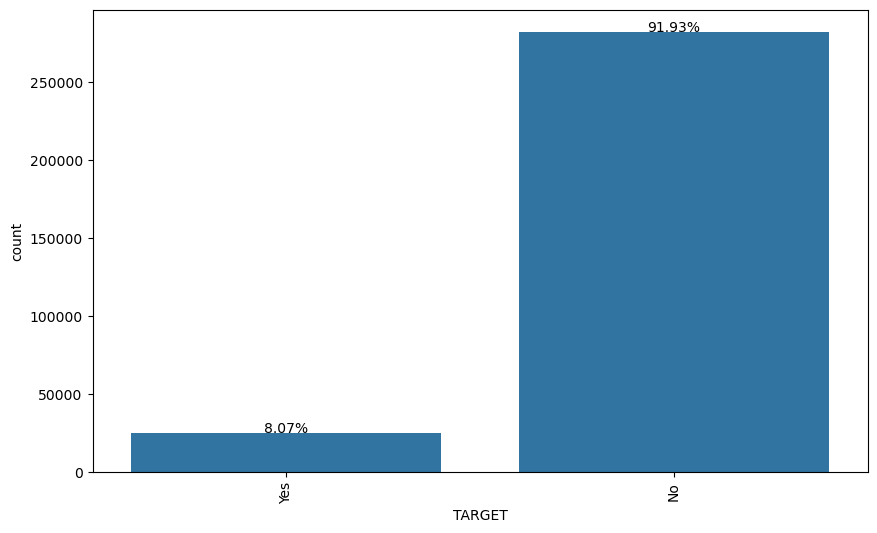

------------------------------------------------------------------------------------------------------------------------


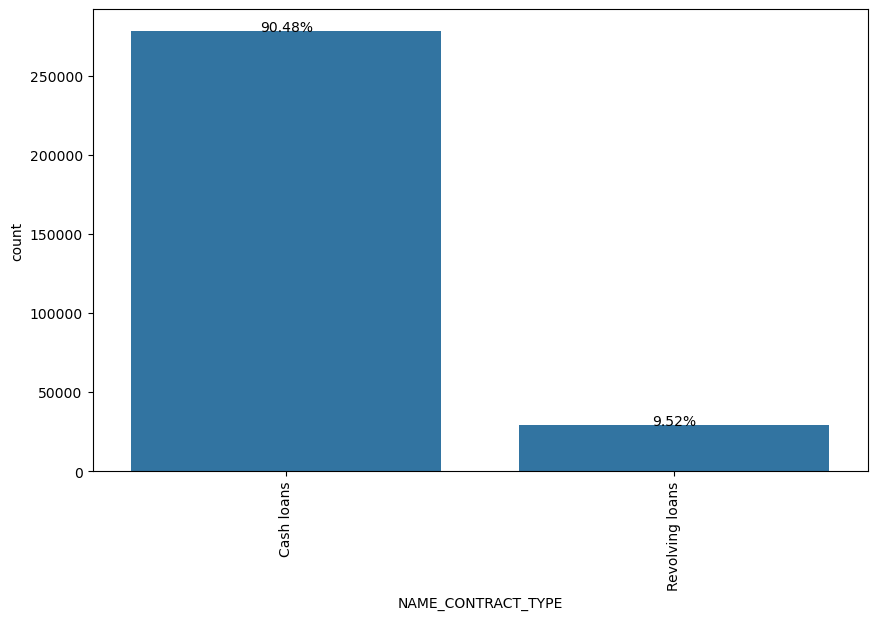

------------------------------------------------------------------------------------------------------------------------


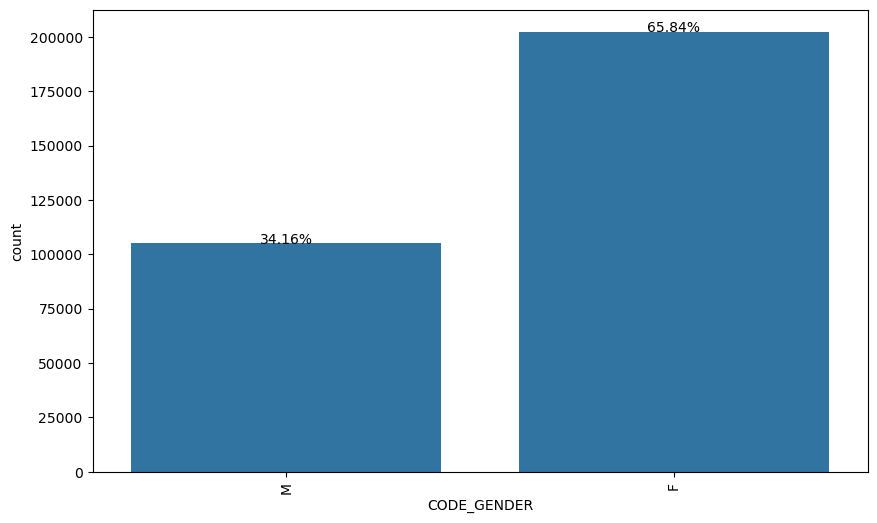

------------------------------------------------------------------------------------------------------------------------


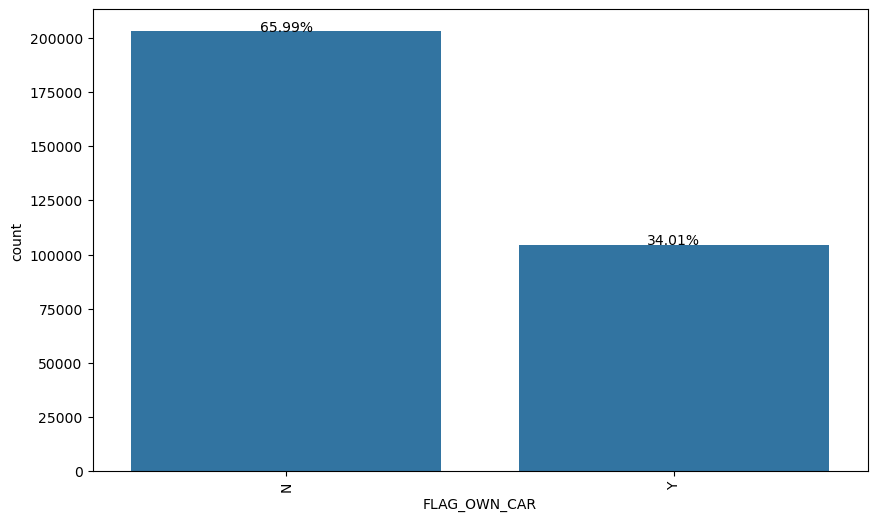

------------------------------------------------------------------------------------------------------------------------


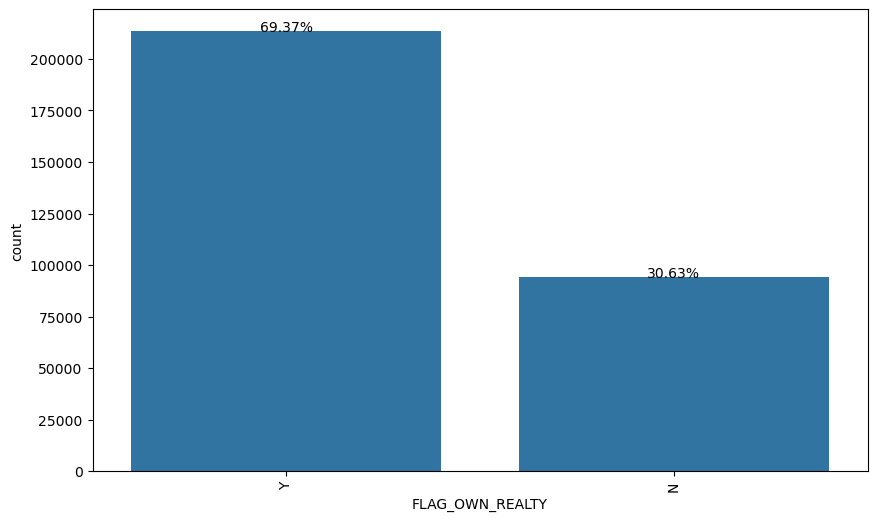

------------------------------------------------------------------------------------------------------------------------


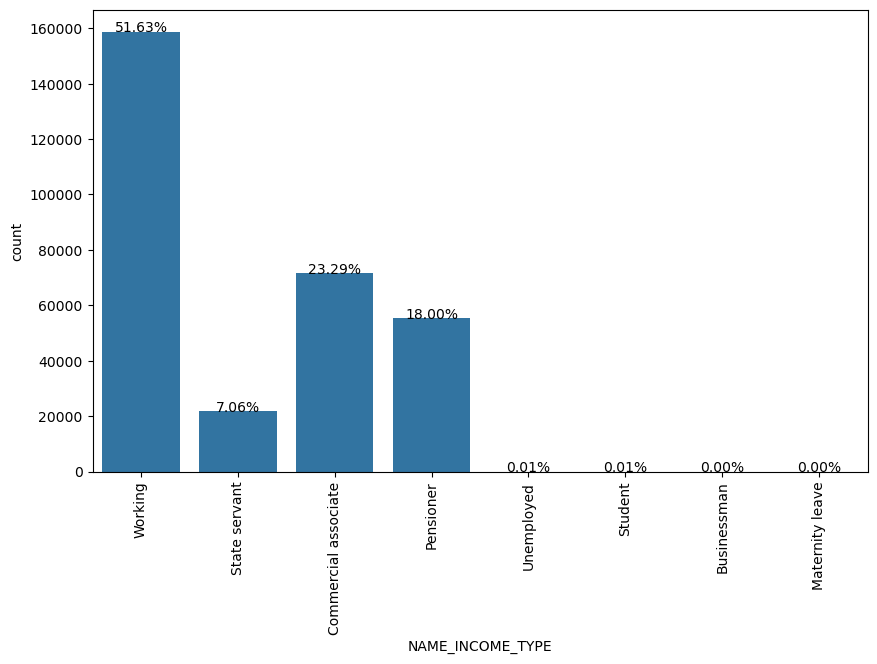

------------------------------------------------------------------------------------------------------------------------


In [265]:
# Visualize the distribution of each categorical feature
for column in cata_df.columns:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=column, data=cata_df)

    # Display percentages on bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3,
                '{:1.2f}%'.format(100 * height / len(cata_df)),
                ha="center")
    plt.xticks(rotation=90)
    plt.show()
    print('-'*120)

### Hypothesis:

The loan application data indicates that 8.07% of applicants faced repayment issues, while 91.93% successfully repaid their loans. Among the types of loans, 90.48% of applicants opted for cash loans, whereas 9.52% chose revolving loans.

In terms of demographics, 34.16% of the loan applicants were male, and 65.84% were female. Additionally, 65.99% of the applicants did not own a car, while 34.01% reported car ownership.

Regarding real estate ownership, 69.37% of applicants owned property, with 30.63% not owning any real estate.

Finally, the highest number of applications came from individuals categorized under the "Working," "Commercial Associate," and "Pensioners" income types, whereas the "Businessmen" and "Maternity Leave" categories had the lowest representation among applicants.




Segmented Univariate analysis of catagorical columns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


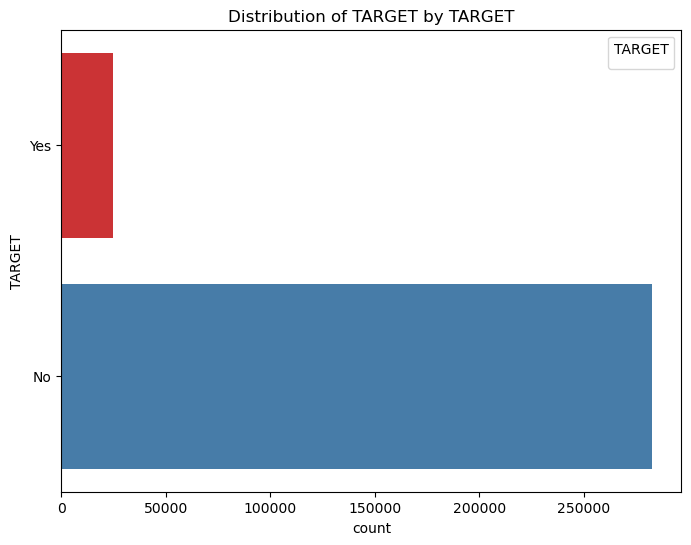

------------------------------------------------------------------------------------------------------------------------


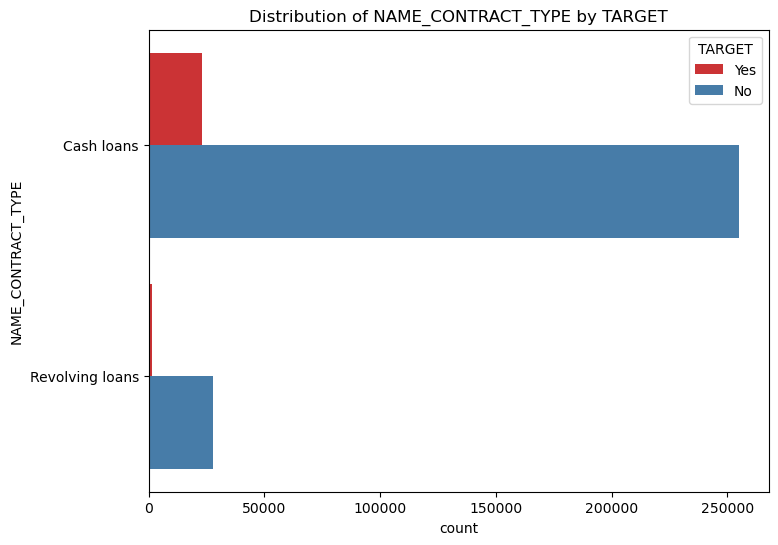

------------------------------------------------------------------------------------------------------------------------


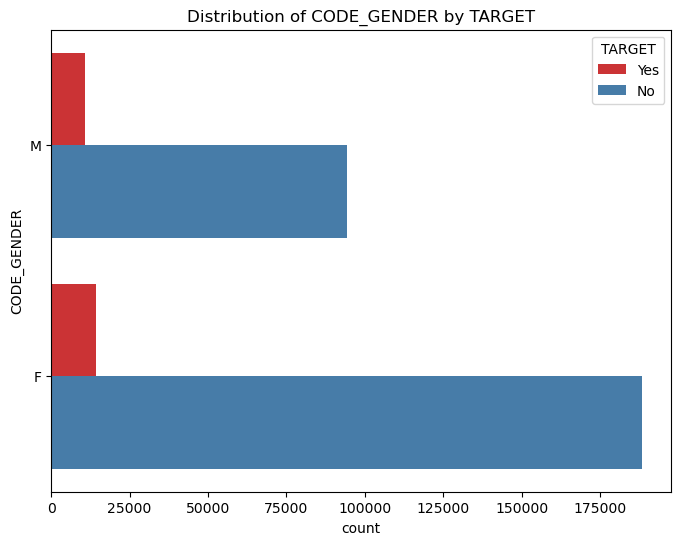

------------------------------------------------------------------------------------------------------------------------


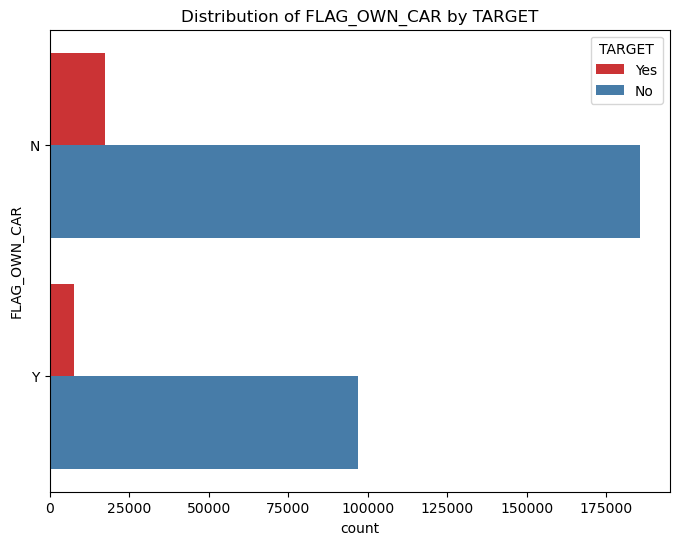

------------------------------------------------------------------------------------------------------------------------


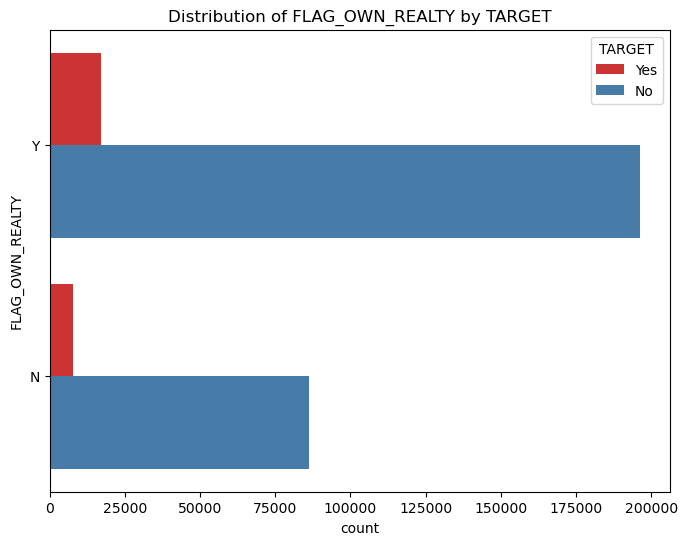

------------------------------------------------------------------------------------------------------------------------


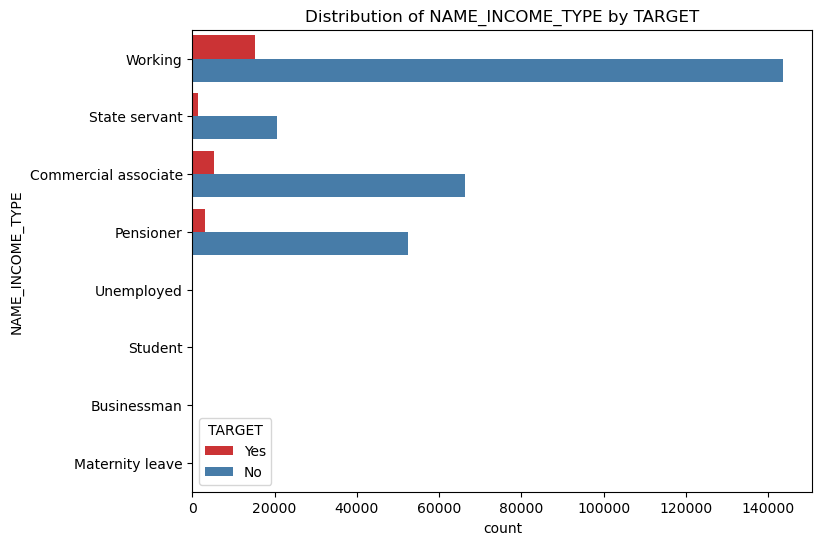

------------------------------------------------------------------------------------------------------------------------


In [268]:
# Iterate through each categorical column and visualize its distribution by target variable
for column in cata_df.columns:
    plt.figure(figsize=(8, 6))  # Set the figure size for better visualization
    # Create a count plot with 'TARGET' as the hue (color differentiation)
    sns.countplot(y=column, hue='TARGET', data=cata_df, palette='Set1')
    plt.legend(title='TARGET')  # Add a legend to indicate 'TARGET' values
    plt.title(f'Distribution of {column} by TARGET')  # Set the title of the plot
    plt.show()  # Display the plot
    print('-'*120)

Hypothesis
Upon analyzing the distribution of contract types by the target variable, it was observed that individuals with cash loans exhibit higher rates of repayment difficulties.

Similarly, when examining the distribution of gender by the target variable, the data indicates that female applicants experience more repayment issues compared to their male counterparts.

A review of vehicle ownership status (flag-own-car) revealed that applicants without vehicle ownership face more repayment challenges than those who own a car.

Furthermore, the distribution of real estate ownership (flag-own-realty) suggests that applicants who own property encounter greater difficulties in repaying loans compared to those without real estate assets.

Finally, an analysis of income types revealed that applicants categorized under the "working" income group have the highest incidence of repayment difficulties, followed closely by those classified under the "commercial associate" category.



In [270]:
# Display the first few rows of the 'num_df' DataFrame.
num_df.head()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,Age,DAYS_EMPLOYED
0,1,202500.0,406597.5,24700.5,25.902806,-637
1,0,270000.0,1293502.5,35698.5,45.900068,-1188
2,0,67500.0,135000.0,6750.0,52.145106,-225
3,0,135000.0,312682.5,29686.5,52.032854,-3039
4,0,121500.0,513000.0,21865.5,54.570842,-3038


In [271]:
# Generate descriptive statistics for the 'DAYS_EMPLOYED' column in the 'num_df' DataFrame.
num_df.DAYS_EMPLOYED.describe()


count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [272]:
# Convert 'DAYS_EMPLOYED' to string and remove potential leading '-' characters.
num_df['DAYS_EMPLOYED'] = num_df['DAYS_EMPLOYED'].astype(str).str.strip('-')
# Convert 'DAYS_EMPLOYED' to float for numerical calculations.
num_df['DAYS_EMPLOYED'] = num_df.DAYS_EMPLOYED.astype(float)
# Calculate employment length in years.
num_df['Employment_length'] = num_df.DAYS_EMPLOYED / 365.25
# Generate descriptive statistics for the newly created 'Employment_length' column.
num_df.Employment_length.describe()

count    307511.000000
mean        185.420239
std         381.776186
min           0.000000
25%           2.554415
50%           6.075291
75%          15.624914
max         999.980835
Name: Employment_length, dtype: float64

In [273]:
# Remove the 'DAYS_EMPLOYED' column from the 'num_df' DataFrame.
num_df = num_df.drop('DAYS_EMPLOYED', axis=1)

Bivariate analysis of Numerical columns

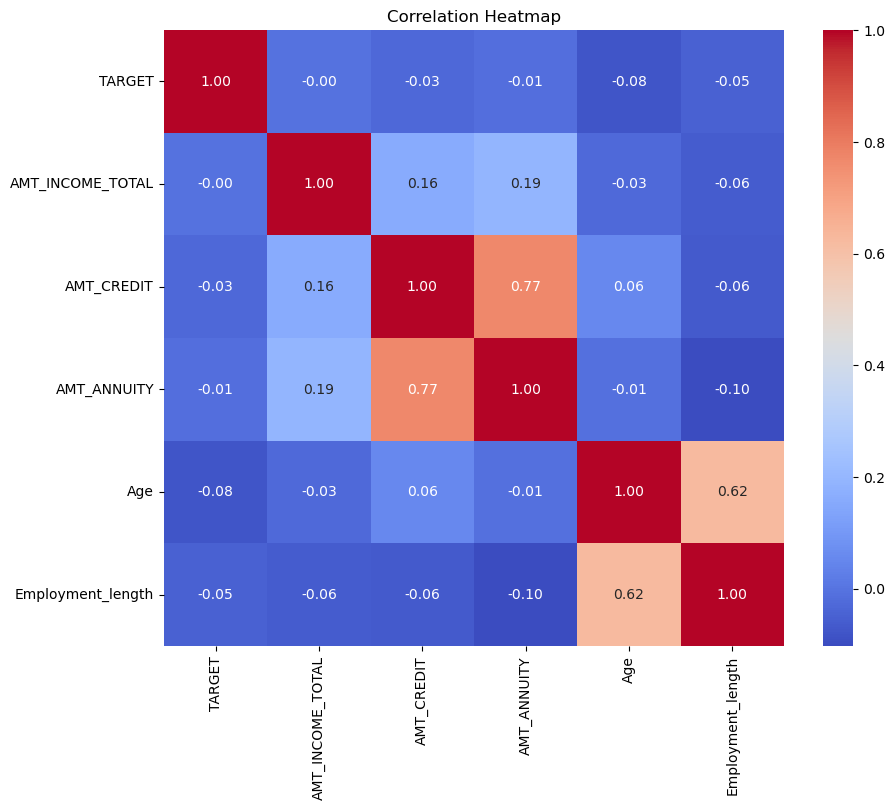

In [275]:
# Calculate the correlation matrix for the 'num_df' DataFrame.
correlation_matrix = num_df.corr()

# Plot the heatmap to visualize correlations.
plt.figure(figsize=(10, 8))  # Set the figure size for better visualization.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Create the heatmap.
plt.title('Correlation Heatmap')  # Set the title of the plot.
plt.show()  # Display the plot.

Income and Credit Analysis:

The correlation between TARGET (likely indicating payment difficulties) and AMT_INCOME_TOTAL is near zero, suggesting that total income does not have a significant relationship with payment difficulties.
Similarly, AMT_CREDIT shows a weak negative correlation with TARGET, indicating that the total credit amount does not strongly predict payment difficulties.
Loan Annuity and Credit:

There is a strong positive correlation between AMT_CREDIT and AMT_ANNUITY (0.77), indicating that as credit amounts increase, annuity payments also increase. However, this does not directly correlate strongly with payment difficulties, as indicated by the weak correlation between these variables and TARGET.
Age and Employment Length:

Age shows a weak negative correlation with TARGET, indicating that older individuals might experience slightly fewer payment difficulties, but the relationship is not strong.
There is a notable positive correlation between Age and Employment_length (0.62), suggesting that older individuals tend to have longer employment histories, which could be a factor in their loan repayment capabilities.
Vehicle Ownership (flag-own-car) and Real Estate Ownership (flag-own-realty):

The heatmap does not include direct indicators like vehicle ownership or real estate ownership, so this hypothesis cannot be revised based on the provided data. However, given the weak correlations of other financial factors with TARGET, it might be inferred that these ownership factors also do not strongly predict payment difficulties.
Income Types:

The heatmap does not directly include income type categories. However, given the weak correlation between AMT_INCOME_TOTAL and TARGET, it might be inferred that the specific type of income (e.g., working, commercial associate) does not have a strong direct correlation with payment difficulties.
The revised hypothesis suggests that, according to the heatmap, financial factors like total income, credit amount, and annuity, as well as demographic factors like age and employment length, have weak correlations with payment difficulties. Therefore, factors such as contract type, gender, vehicle ownership, and income types might also have limited predictive power regarding payment difficulties, though this cannot be confirmed directly from the heatmap alone.

Multi_variate analysis between all the catagorical and numerical columns

In [278]:
num_df.columns

Index(['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'Age',
       'Employment_length'],
      dtype='object')

In [279]:
cata_df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE'],
      dtype='object')

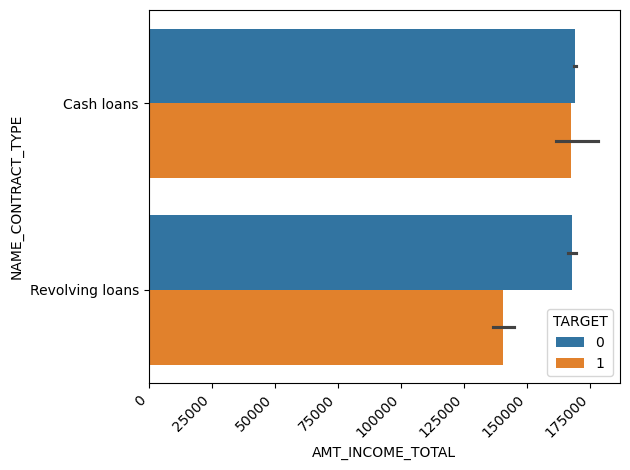

In [280]:
# Create the bar plot
sns.barplot(x=num_df['AMT_INCOME_TOTAL'], y=cata_df['NAME_CONTRACT_TYPE'],hue=num_df['TARGET'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot


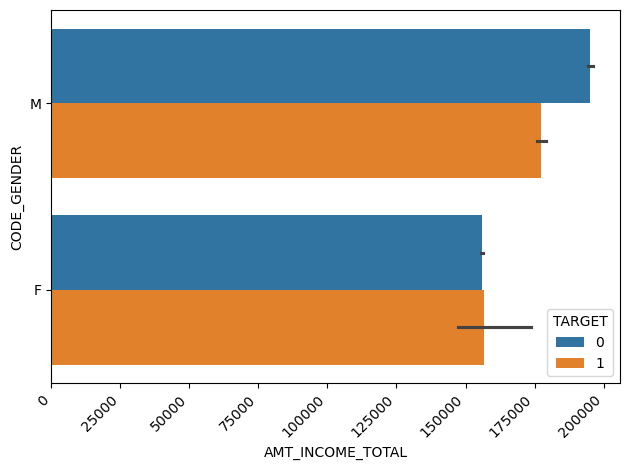

In [281]:
# Create the bar plot
sns.barplot(x=num_df['AMT_INCOME_TOTAL'], y=cata_df['CODE_GENDER'],hue=num_df['TARGET'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

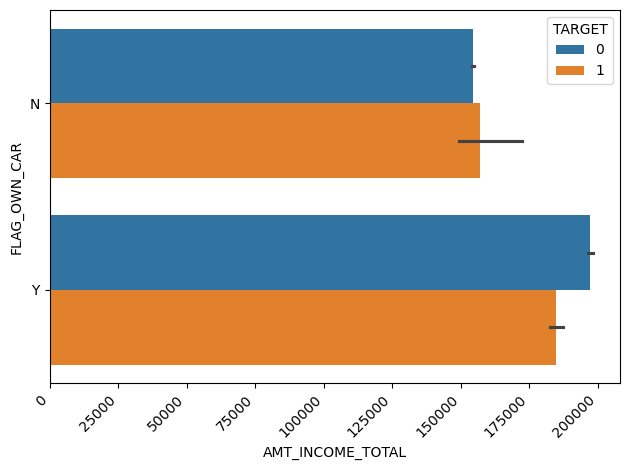

In [282]:
sns.barplot(x=num_df['AMT_INCOME_TOTAL'], y=cata_df['FLAG_OWN_CAR'],hue=num_df['TARGET'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

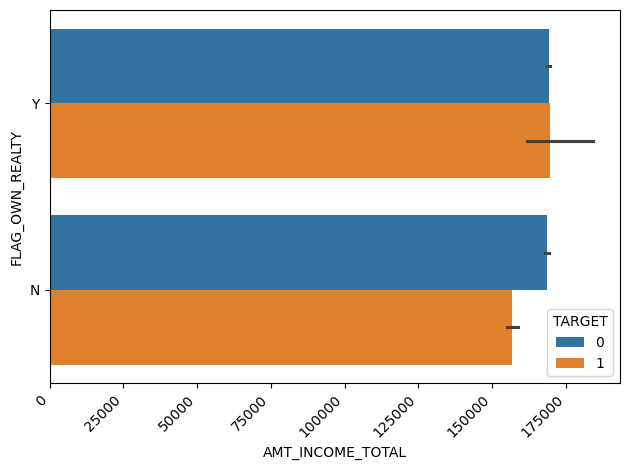

In [283]:
sns.barplot(x=num_df['AMT_INCOME_TOTAL'], y=cata_df['FLAG_OWN_REALTY'],hue=num_df['TARGET'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

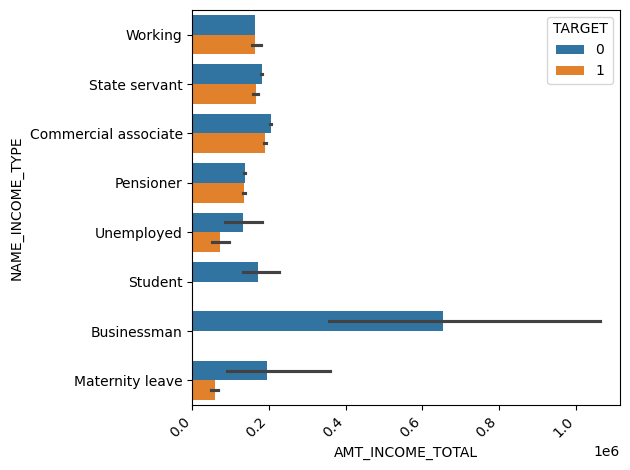

In [284]:
sns.barplot(x=num_df['AMT_INCOME_TOTAL'], y=cata_df['NAME_INCOME_TYPE'],hue=num_df['TARGET'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

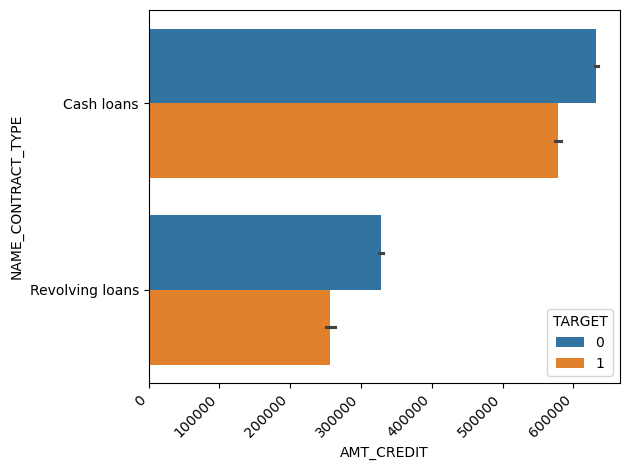

In [285]:
sns.barplot(x=num_df['AMT_CREDIT'], y=cata_df['NAME_CONTRACT_TYPE'],hue=num_df['TARGET'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

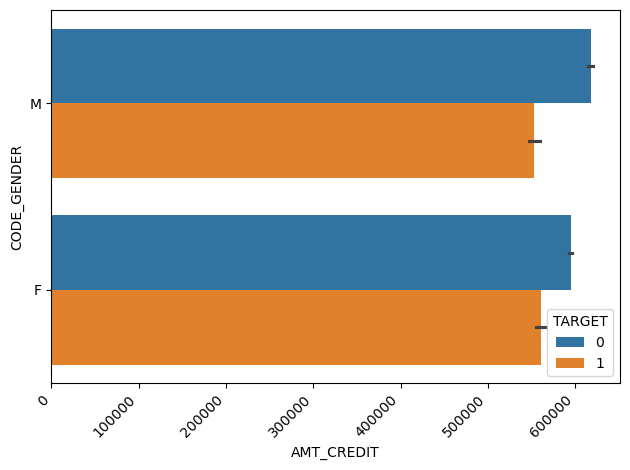

In [286]:
sns.barplot(x=num_df['AMT_CREDIT'], y=cata_df['CODE_GENDER'],hue=num_df['TARGET'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

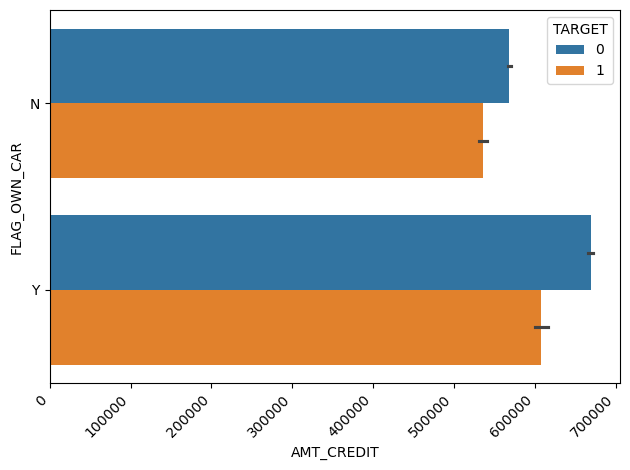

In [287]:
sns.barplot(x=num_df['AMT_CREDIT'], y=cata_df['FLAG_OWN_CAR'],hue=num_df['TARGET'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

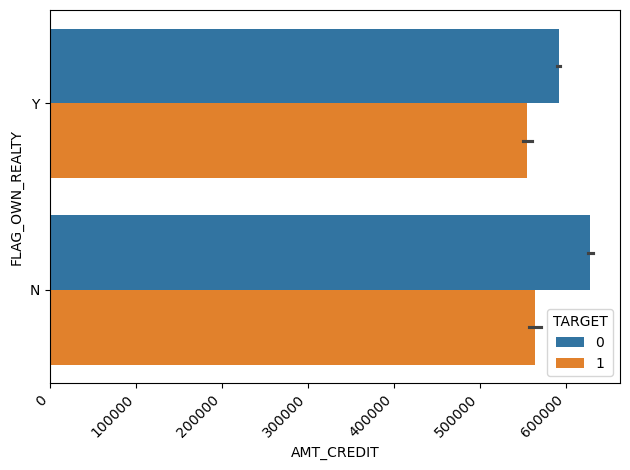

In [288]:
sns.barplot(x=num_df['AMT_CREDIT'], y=cata_df['FLAG_OWN_REALTY'],hue=num_df['TARGET'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

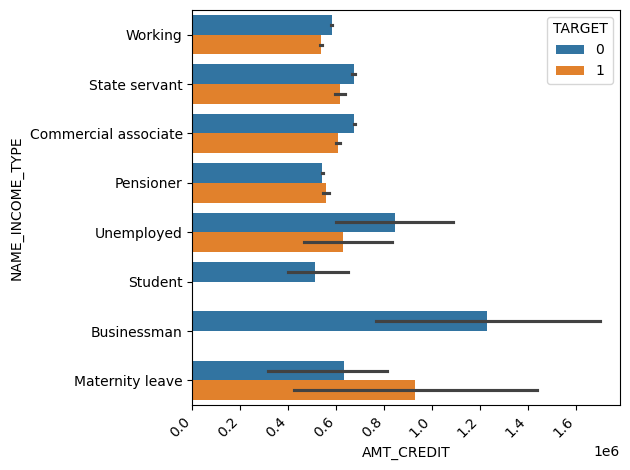

In [289]:
sns.barplot(x=num_df['AMT_CREDIT'], y=cata_df['NAME_INCOME_TYPE'],hue=num_df['TARGET'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

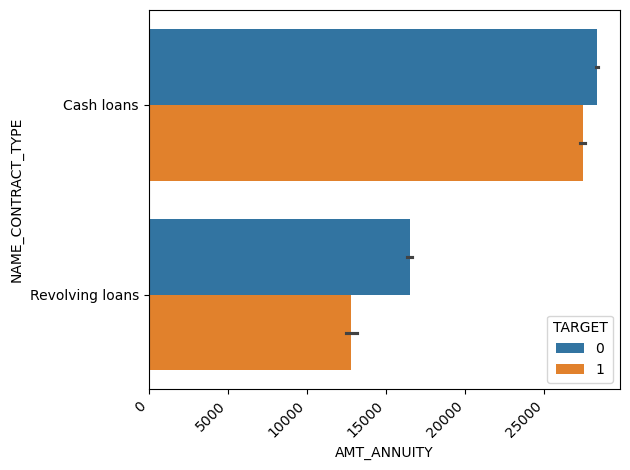

In [290]:
sns.barplot(x=num_df['AMT_ANNUITY'], y=cata_df['NAME_CONTRACT_TYPE'],hue=num_df['TARGET'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

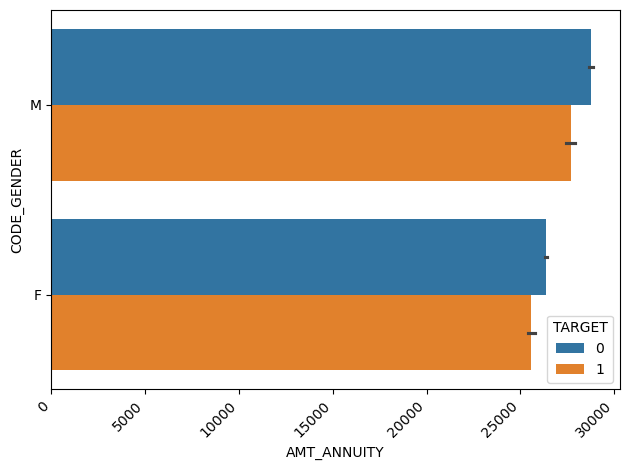

In [291]:
sns.barplot(x=num_df['AMT_ANNUITY'], y=cata_df['CODE_GENDER'],hue=num_df['TARGET'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

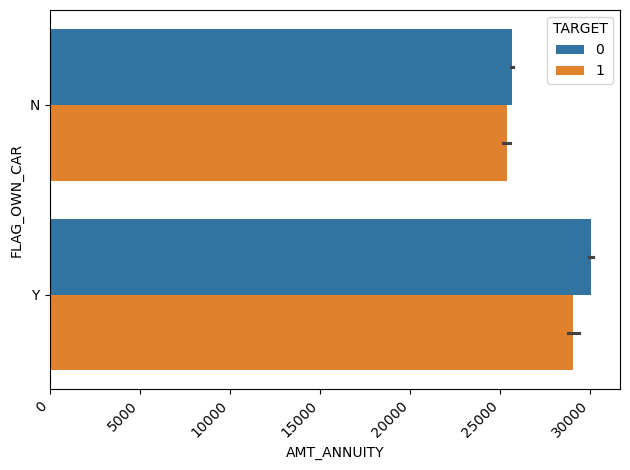

In [292]:
sns.barplot(x=num_df['AMT_ANNUITY'], y=cata_df['FLAG_OWN_CAR'],hue=num_df['TARGET'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

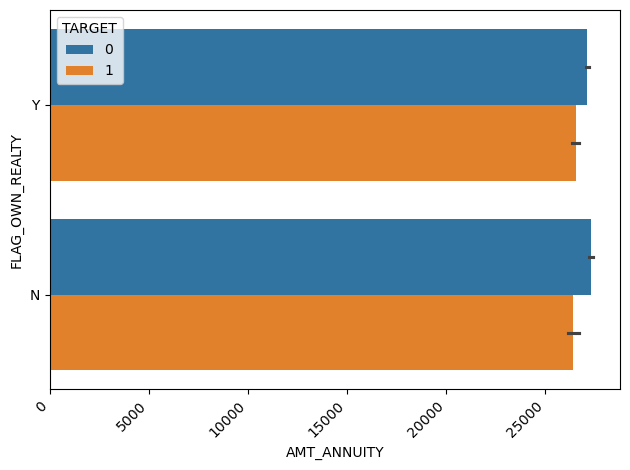

In [293]:
sns.barplot(x=num_df['AMT_ANNUITY'], y=cata_df['FLAG_OWN_REALTY'],hue=num_df['TARGET'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

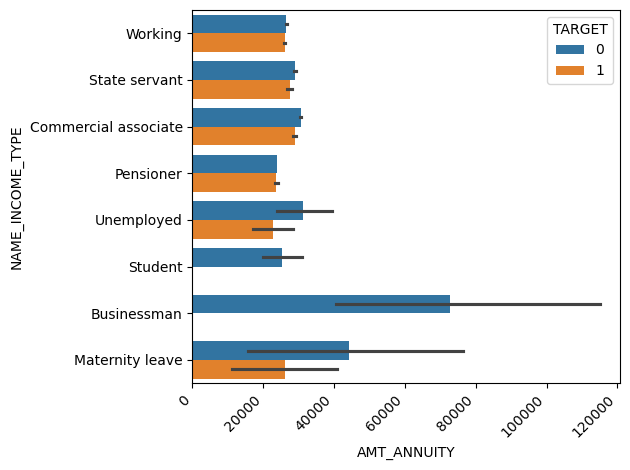

In [294]:
sns.barplot(x=num_df['AMT_ANNUITY'], y=cata_df['NAME_INCOME_TYPE'],hue=num_df['TARGET'])
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

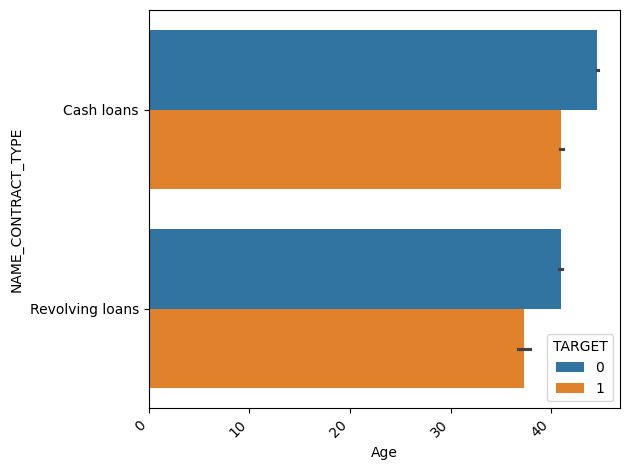

In [295]:
sns.barplot(x=num_df['Age'], y=cata_df['NAME_CONTRACT_TYPE'],hue=num_df['TARGET'])
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

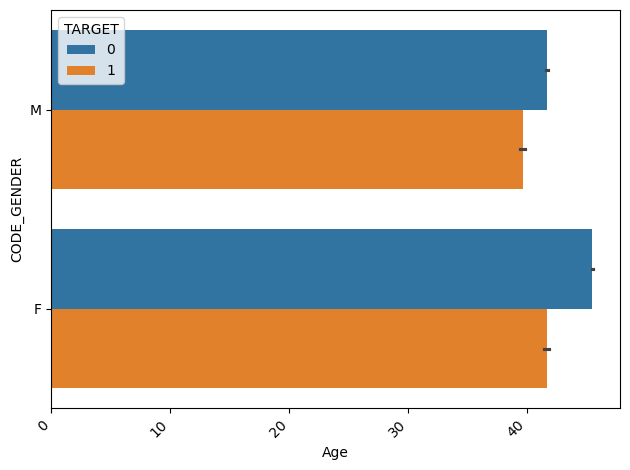

In [296]:
sns.barplot(x=num_df['Age'], y=cata_df['CODE_GENDER'],hue=num_df['TARGET'])
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

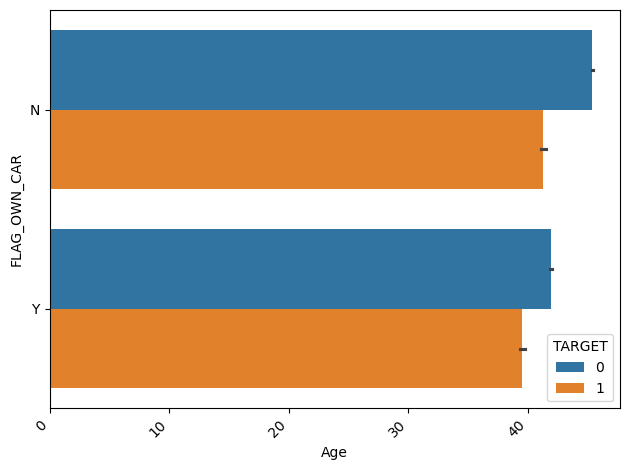

In [297]:
sns.barplot(x=num_df['Age'], y=cata_df['FLAG_OWN_CAR'],hue=num_df['TARGET'])
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

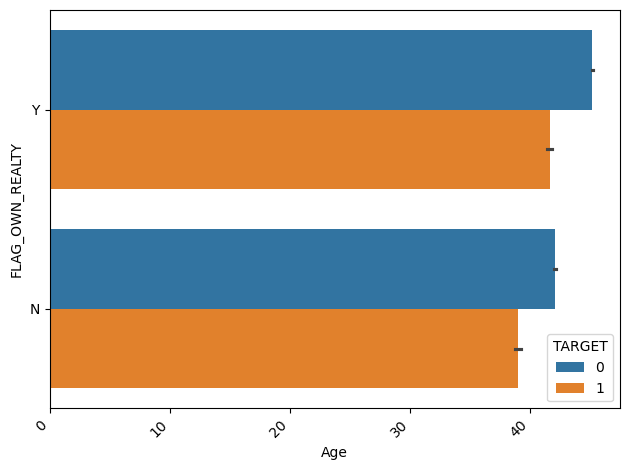

In [298]:
sns.barplot(x=num_df['Age'], y=cata_df['FLAG_OWN_REALTY'],hue=num_df['TARGET'])
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

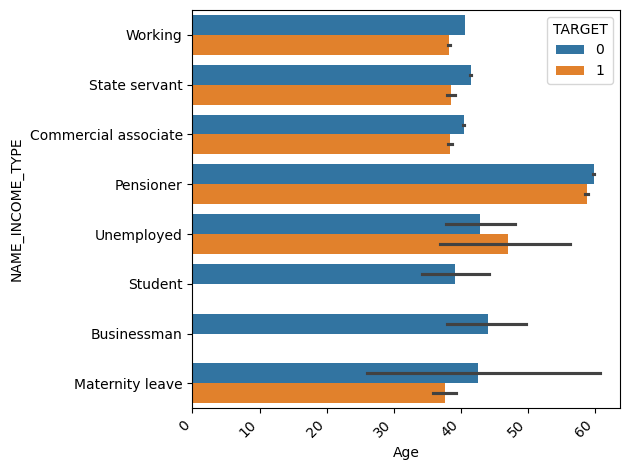

In [299]:
sns.barplot(x=num_df['Age'], y=cata_df['NAME_INCOME_TYPE'],hue=num_df['TARGET'])
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

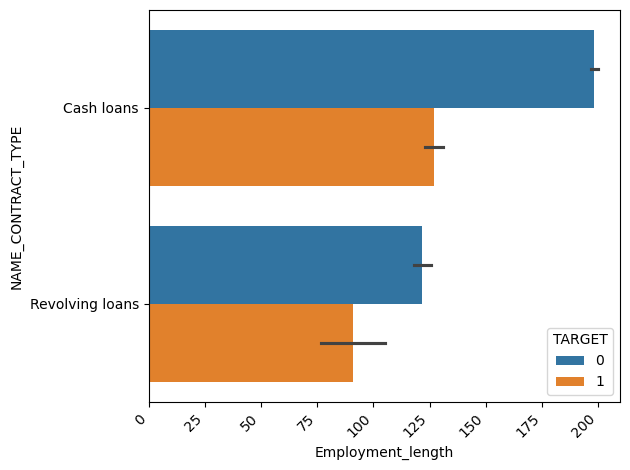

In [300]:
sns.barplot(x=num_df['Employment_length'], y=cata_df['NAME_CONTRACT_TYPE'],hue=num_df['TARGET'])
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

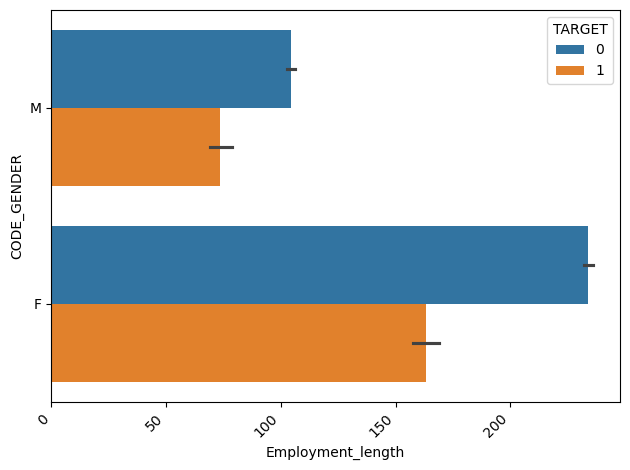

In [301]:
sns.barplot(x=num_df['Employment_length'], y=cata_df['CODE_GENDER'],hue=num_df['TARGET'])
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

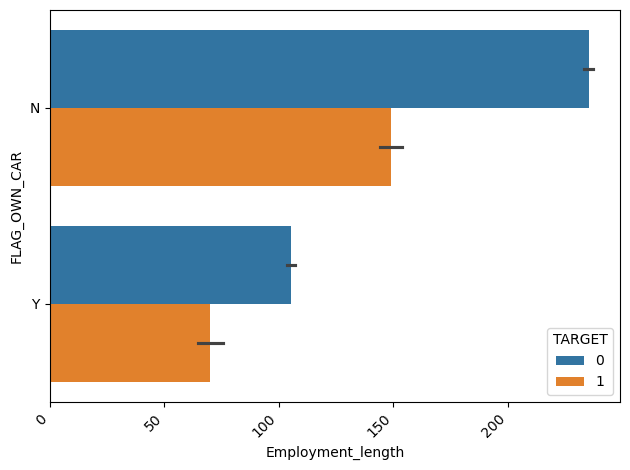

In [302]:
sns.barplot(x=num_df['Employment_length'], y=cata_df['FLAG_OWN_CAR'],hue=num_df['TARGET'])
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

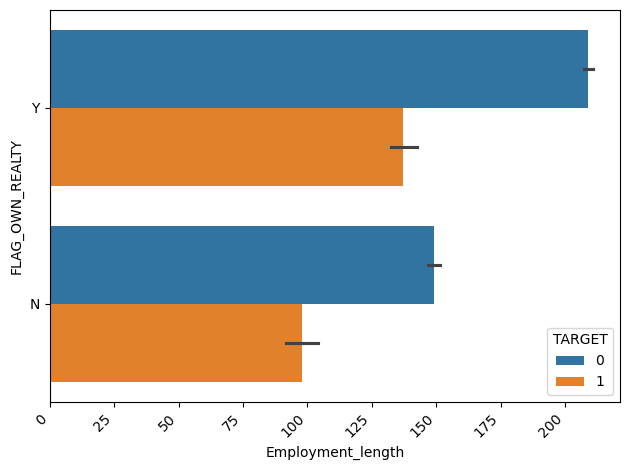

In [303]:
sns.barplot(x=num_df['Employment_length'], y=cata_df['FLAG_OWN_REALTY'],hue=num_df['TARGET'])
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

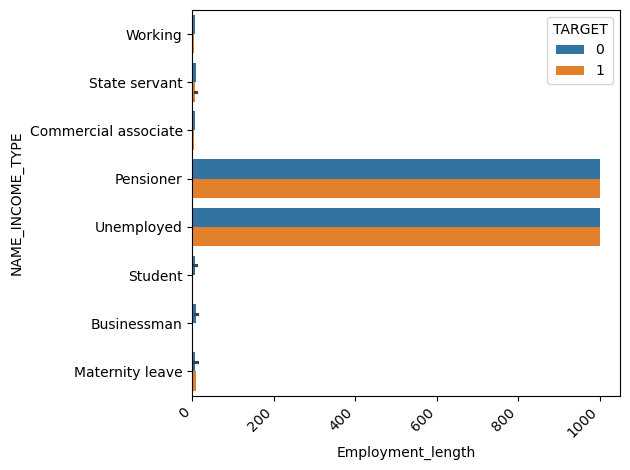

In [304]:
sns.barplot(x=num_df['Employment_length'], y=cata_df['NAME_INCOME_TYPE'],hue=num_df['TARGET'])
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

Based on the exploratory data analysis (EDA) plots, the following detailed hypothesis can be formulated:

**Hypothesis**: Individuals who default on their loans (TARGET=1) tend to have a specific set of socioeconomic characteristics and loan-related attributes that distinguish them from non-defaulters (TARGET=0). These characteristics include a total income typically ranging between INR 50,000 and INR 100,000, a credit amount often between INR 3,00,000 and INR 4,00,000, and an employment length usually less than 5 years. Furthermore, the type of loan (cash loans vs. revolving loans), gender, and ownership of assets such as cars and real estate significantly influence the likelihood of default.

**Supporting Observations**:

1. **Total Income**:
   - The total income of defaulters (TARGET=1) is generally concentrated between INR 50,000 and INR 100,000. In contrast, non-defaulters (TARGET=0) exhibit a broader range of income, with many individuals earning above INR 100,000. This suggests that lower income levels may be a strong indicator of higher default risk.

2. **Credit Amount**:
   - Individuals who default on their loans tend to have credit amounts clustered between INR 3,00,000 and INR 4,00,000. This is higher compared to non-defaulters, who show a more diverse distribution, with many having credit amounts below INR 3,00,000. The higher credit amounts among defaulters could indicate a greater financial burden, contributing to their inability to repay.

3. **Employment Length**:
   - Employment length is another critical factor, with defaulters generally having shorter employment durations, typically less than 5 years. In contrast, non-defaulters are more likely to have longer employment histories, often exceeding 5 years. This suggests that job stability and tenure play a significant role in a borrower’s ability to meet loan obligations.

4. **Loan Type**:
   - The type of loan taken also appears to influence default rates. The data shows a higher proportion of defaults associated with cash loans compared to revolving loans. This may indicate that cash loans, which often involve larger lump-sum payments, pose a greater financial challenge to borrowers, leading to a higher likelihood of default.

5. **Gender**:
   - Gender differences are evident in the default rates, with males showing a slightly higher tendency to default compared to females. This observation suggests that gender-specific factors, possibly related to income levels, employment stability, or financial management habits, could affect the likelihood of default.

6. **Ownership of Assets**:
   - Ownership of assets, such as cars and real estate, is also a significant factor. Defaulters are less likely to own cars and real estate compared to non-defaulters. This lack of asset ownership may reflect lower overall financial security, which could contribute to a higher risk of default.

These detailed observations indicate that a combination of lower income, higher credit amounts, shorter employment lengths, and specific demographic factors such as gender and asset ownership are associated with a higher likelihood of loan default. These findings suggest that these variables could be used as predictive indicators in a risk assessment model to identify borrowers at higher risk of defaulting on their loans.

Dealing with Outliers and univariate analysis on numerical columns

In [307]:
# Display the first few rows of the 'num_df' DataFrame to inspect the data.
num_df.head()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,Age,Employment_length
0,1,202500.0,406597.5,24700.5,25.902806,1.744011
1,0,270000.0,1293502.5,35698.5,45.900068,3.252567
2,0,67500.0,135000.0,6750.0,52.145106,0.616016
3,0,135000.0,312682.5,29686.5,52.032854,8.320329
4,0,121500.0,513000.0,21865.5,54.570842,8.317591


In [308]:
# Generate descriptive statistics for the 'AMT_INCOME_TOTAL' column in the 'num_df' DataFrame.
num_df.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

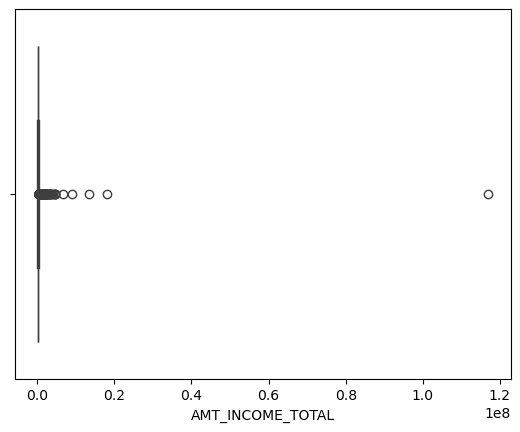

In [309]:
# Create a box plot to visualize the distribution and potential outliers in 'AMT_INCOME_TOTAL'.
sns.boxplot(x=num_df['AMT_INCOME_TOTAL'])
plt.show()  # Display the plot.

In [310]:
num_df.AMT_INCOME_TOTAL.shape

(307511,)

Only 5% data will be lost after getting rid of the outliers

In [312]:
# Calculate the first quartile (Q1) of 'AMT_CREDIT'.
Q1 = num_df['AMT_INCOME_TOTAL'].quantile(0.25)
# Calculate the third quartile (Q3) of 'AMT_CREDIT'.
Q3 = num_df['AMT_INCOME_TOTAL'].quantile(0.75)
# Calculate the interquartile range (IQR).
IQR = Q3 - Q1
# Calculate the lower and upper limits for outlier removal.
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Clip values in 'AMT_CREDIT' to be within the calculated limits.
num_df['AMT_INCOME_TOTAL'] = np.clip(num_df['AMT_INCOME_TOTAL'], lower_limit, upper_limit)

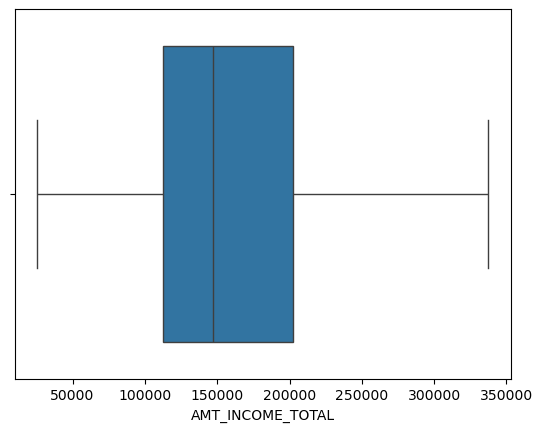

count    307511.000000
mean     162626.947877
std       73303.150927
min       25650.000000
25%      112500.000000
50%      147150.000000
75%      202500.000000
max      337500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [313]:
# Create a box plot to visualize the distribution of 'AMT_INCOME_TOTAL' after removing outliers.
sns.boxplot(x=num_df['AMT_INCOME_TOTAL'])
plt.show()  # Display the plot.

# Generate descriptive statistics for 'AMT_INCOME_TOTAL' after removing outliers.
num_df['AMT_INCOME_TOTAL'].describe()

In [314]:
# Generate descriptive statistics for the 'AMT_CREDIT' column in the 'num_df' DataFrame.
num_df.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

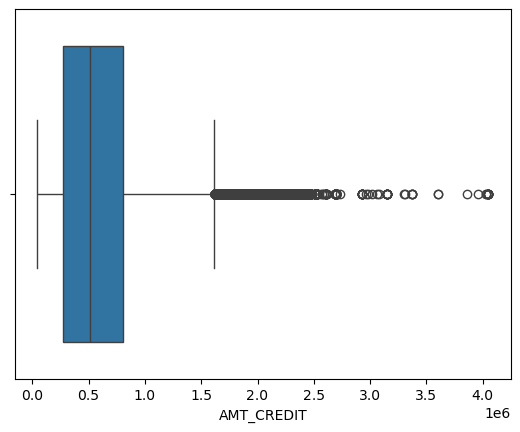

In [315]:
# Create a box plot to visualize the distribution and potential outliers in 'AMT_CREDIT'.
sns.boxplot(x=num_df['AMT_CREDIT'])
plt.show()  # Display the plot.

In [316]:
# Calculate the first quartile (Q1) of 'AMT_CREDIT'.
Q1 = num_df['AMT_CREDIT'].quantile(0.25)
# Calculate the third quartile (Q3) of 'AMT_CREDIT'.
Q3 = num_df['AMT_CREDIT'].quantile(0.75)
# Calculate the interquartile range (IQR).
IQR = Q3 - Q1
# Calculate the lower and upper limitss for outlier removal.
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Clip values in 'AMT_CREDIT' to be within the calculated limitss.
num_df['AMT_CREDIT'] = np.clip(num_df['AMT_CREDIT'], lower_limit, upper_limit)

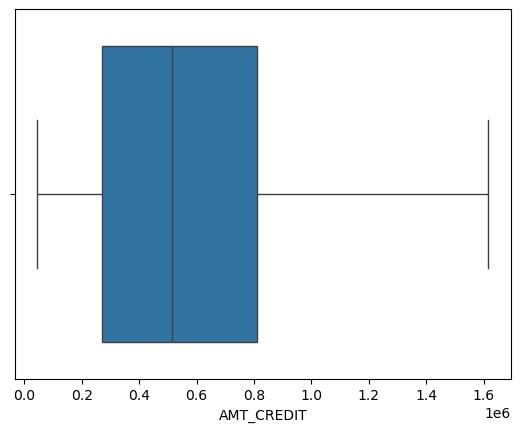

In [317]:
# Create a box plot to visualize the distribution of 'AMT_CREDIT' after clipping outliers.
sns.boxplot(x=num_df['AMT_CREDIT'])
plt.show()  # Display the plot.

In [318]:
# Generate descriptive statistics for the 'AMT_ANNUITY' column in the 'num_df' DataFrame.
num_df.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

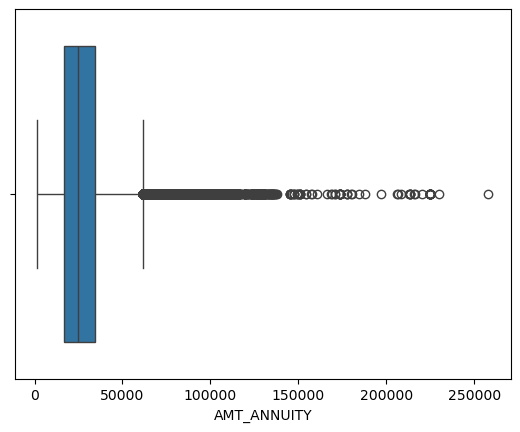

In [319]:
# Create a box plot to visualize the distribution and potential outliers in 'AMT_ANNUITY'.
sns.boxplot(x=num_df['AMT_ANNUITY'])
plt.show()  # Display the plot.

In [320]:
# Calculate the first quartile (Q1) of 'AMT_CREDIT'.
Q1 = num_df['AMT_ANNUITY'].quantile(0.25)
# Calculate the third quartile (Q3) of 'AMT_CREDIT'.
Q3 = num_df['AMT_ANNUITY'].quantile(0.75)
# Calculate the interquartile range (IQR).
IQR = Q3 - Q1
# Calculate the lower and upper limits for outlier removal.
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Clip values in 'AMT_CREDIT' to be within the calculated limits.
num_df['AMT_ANNUITY'] = np.clip(num_df['AMT_ANNUITY'], lower_limit, upper_limit)

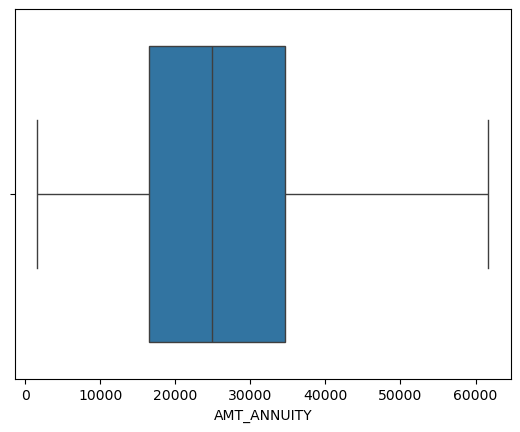

In [321]:
# Create a box plot to visualize the distribution of 'AMT_CREDIT' after clipping outliers.
sns.boxplot(x=num_df['AMT_ANNUITY'])
plt.show()  # Display the plot.

In [322]:
# Generate descriptive statistics for the 'Age' column in the 'num_df' DataFrame.
num_df.Age.describe()


count    307511.000000
mean         43.906900
std          11.947950
min          20.503765
25%          33.984942
50%          43.121150
75%          53.886379
max          69.073238
Name: Age, dtype: float64

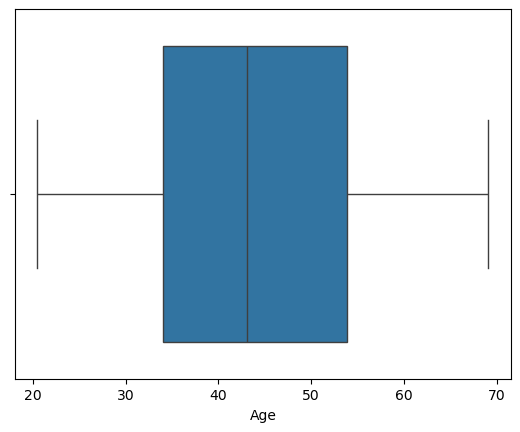

In [323]:
# Create a box plot to visualize the distribution and potential outliers in 'Age'.
sns.boxplot(x=num_df['Age'])
plt.show()  # Display the plot.

In [324]:
# Generate descriptive statistics for the 'Employment_length' column in the 'num_df' DataFrame.
num_df.Employment_length.describe()

count    307511.000000
mean        185.420239
std         381.776186
min           0.000000
25%           2.554415
50%           6.075291
75%          15.624914
max         999.980835
Name: Employment_length, dtype: float64

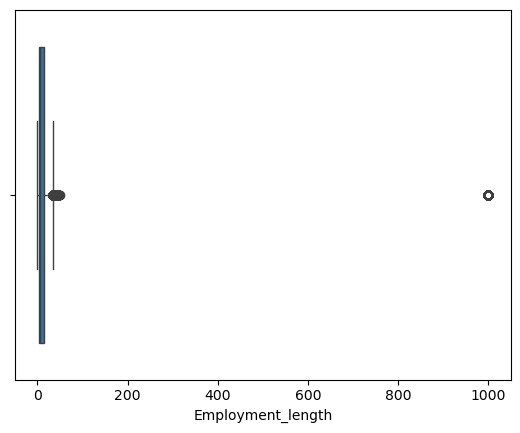

In [325]:
# Create a box plot to visualize the distribution and potential outliers in 'Employment_length'.
sns.boxplot(x=num_df['Employment_length'])
plt.show()  # Display the plot.

In [326]:
# Calculate the first quartile (Q1) of 'AMT_CREDIT'.
Q1 = num_df['Employment_length'].quantile(0.25)
# Calculate the third quartile (Q3) of 'AMT_CREDIT'.
Q3 = num_df['Employment_length'].quantile(0.75)
# Calculate the interquartile range (IQR).
IQR = Q3 - Q1
# Calculate the lower and upper limits for outlier removal.
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Clip values in 'AMT_CREDIT' to be within the calculated limits.
num_df['Employment_length'] = np.clip(num_df['Employment_length'], lower_limit, upper_limit)

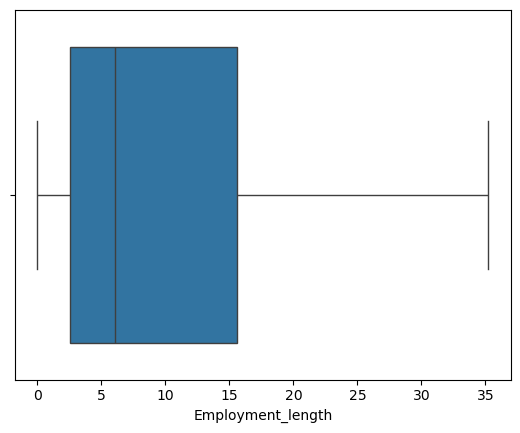

In [327]:
# Create a box plot to visualize the distribution of 'AMT_CREDIT' after clipping outliers.
sns.boxplot(x=num_df['Employment_length'])
plt.show()  # Display the plot.

In [328]:
cata_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE
0,Yes,Cash loans,M,N,Y,Working
1,No,Cash loans,F,N,N,State servant
2,No,Revolving loans,M,Y,Y,Working
3,No,Cash loans,F,N,Y,Working
4,No,Cash loans,M,N,Y,Working


In [329]:
num_df=num_df.drop(num_df.columns[0],axis=1)

In [330]:
num_df.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,Age,Employment_length
0,202500.0,406597.5,24700.5,25.902806,1.744011
1,270000.0,1293502.5,35698.5,45.900068,3.252567
2,67500.0,135000.0,6750.0,52.145106,0.616016
3,135000.0,312682.5,29686.5,52.032854,8.320329
4,121500.0,513000.0,21865.5,54.570842,8.317591


In [331]:
app_df = pd.concat([cata_df, num_df], axis=1)

In [332]:
app_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,Age,Employment_length
0,Yes,Cash loans,M,N,Y,Working,202500.0,406597.5,24700.5,25.902806,1.744011
1,No,Cash loans,F,N,N,State servant,270000.0,1293502.5,35698.5,45.900068,3.252567
2,No,Revolving loans,M,Y,Y,Working,67500.0,135000.0,6750.0,52.145106,0.616016
3,No,Cash loans,F,N,Y,Working,135000.0,312682.5,29686.5,52.032854,8.320329
4,No,Cash loans,M,N,Y,Working,121500.0,513000.0,21865.5,54.570842,8.317591


In [333]:
app_df = pd.concat([data['SK_ID_CURR'], app_df], axis=1)

In [334]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,Age,Employment_length
0,100002,Yes,Cash loans,M,N,Y,Working,202500.0,406597.5,24700.5,25.902806,1.744011
1,100003,No,Cash loans,F,N,N,State servant,270000.0,1293502.5,35698.5,45.900068,3.252567
2,100004,No,Revolving loans,M,Y,Y,Working,67500.0,135000.0,6750.0,52.145106,0.616016
3,100006,No,Cash loans,F,N,Y,Working,135000.0,312682.5,29686.5,52.032854,8.320329
4,100007,No,Cash loans,M,N,Y,Working,121500.0,513000.0,21865.5,54.570842,8.317591


Previous Application Data

In [336]:
# Load the application data into a pandas DataFrame
data1 = pd.read_csv('previous_application.csv')

# Display the first few rows of the DataFrame to inspect the data
data1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [337]:
# Calculate the percentage of null values in each column
null_percentages = (data1.isnull().sum() / len(data1)) * 100

# Identify columns with a high percentage of null values (greater than 30%)
high_null_columns = null_percentages[null_percentages > 30]

# Count the number of columns with a high percentage of null values
high_null_columns.value_counts().sum()

11

In [338]:
# Drop the columns with a high percentage of null values from the DataFrame
data1 = data1.drop(columns=high_null_columns.index)

In [339]:
# Display the shape (number of rows and columns) of the DataFrame after dropping columns
data1.shape

(1670214, 26)

In [340]:
# Display a concise summary of the DataFrame, including column names, data types, and non-null values.
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [341]:
data1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [342]:
# Select the first 5 rows and the first 20 columns of the DataFrame
data1.iloc[:5, 0:20]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in


In [343]:
# Create a new DataFrame 'cata_df' by selecting specific columns related to categorical features.
cata_df1=data1[['NAME_CONTRACT_STATUS','NAME_CONTRACT_TYPE','NFLAG_LAST_APPL_IN_DAY','WEEKDAY_APPR_PROCESS_START','NAME_PAYMENT_TYPE','NAME_PORTFOLIO']]

In [344]:
# Display the first few rows of the 'cata_df' DataFrame to inspect the categorical data.
cata_df1.head()

,NAME_CONTRACT_STATUS,NAME_CONTRACT_TYPE,NFLAG_LAST_APPL_IN_DAY,WEEKDAY_APPR_PROCESS_START,NAME_PAYMENT_TYPE,NAME_PORTFOLIO
0,Approved,Consumer loans,1,SATURDAY,Cash through the bank,POS
1,Approved,Cash loans,1,THURSDAY,XNA,Cash
2,Approved,Cash loans,1,TUESDAY,Cash through the bank,Cash
3,Approved,Cash loans,1,MONDAY,Cash through the bank,Cash
4,Refused,Cash loans,1,THURSDAY,Cash through the bank,Cash


In [345]:
# Create a new DataFrame 'num_df' by selecting columns related to numerical features.
num_df1=data1[['NAME_CONTRACT_STATUS','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_DECISION']]

In [346]:
# Display the first few rows of the 'num_df' DataFrame to inspect the numerical data.
num_df1.head()

,NAME_CONTRACT_STATUS,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION
0,Approved,1730.430,17145.0,17145.0,17145.0,-73
1,Approved,25188.615,607500.0,679671.0,607500.0,-164
2,Approved,15060.735,112500.0,136444.5,112500.0,-301
3,Approved,47041.335,450000.0,470790.0,450000.0,-512
4,Refused,31924.395,337500.0,404055.0,337500.0,-781


In [347]:
# Display a concise summary of the 'cata_df' DataFrame, including column names, data types, and non-null values.
cata_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 6 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   NAME_CONTRACT_STATUS        1670214 non-null  object
 1   NAME_CONTRACT_TYPE          1670214 non-null  object
 2   NFLAG_LAST_APPL_IN_DAY      1670214 non-null  int64 
 3   WEEKDAY_APPR_PROCESS_START  1670214 non-null  object
 4   NAME_PAYMENT_TYPE           1670214 non-null  object
 5   NAME_PORTFOLIO              1670214 non-null  object
dtypes: int64(1), object(5)
memory usage: 76.5+ MB


No null data detected

In [349]:
# Count the occurrences of each unique value in the 'NAME_CONTRACT_STATUS' column of 'cata_df'.
cata_df1.NAME_CONTRACT_STATUS.value_counts()

NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64

In [350]:
# Count the occurrences of each unique value in the 'NAME_CONTRACT_TYPE' column of 'cata_df'.
cata_df1.NAME_CONTRACT_TYPE.value_counts()

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: count, dtype: int64

In [351]:
# Filter the 'cata_df' DataFrame to exclude rows where 'NAME_CONTRACT_TYPE' is 'XNA'.
cata_df1 = cata_df1[cata_df1['NAME_CONTRACT_TYPE'] != 'XNA']

In [352]:
# Count the occurrences of each unique value in the 'NAME_CONTRACT_TYPE' column of the filtered 'cata_df'.
cata_df1.NAME_CONTRACT_TYPE.value_counts()

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
Name: count, dtype: int64

In [353]:
# Count the occurrences of each unique value in the 'NFLAG_LAST_APPL_IN_DAY' column of 'cata_df'.
cata_df1.NFLAG_LAST_APPL_IN_DAY.value_counts()

NFLAG_LAST_APPL_IN_DAY
1    1663968
0       5900
Name: count, dtype: int64

In [354]:
# Replace numerical values in the 'NFLAG_LAST_APPL_IN_DAY' column with more descriptive labels.
cata_df1.NFLAG_LAST_APPL_IN_DAY.replace({0:'No',1:'Yes'},inplace=True)

In [355]:
# Count the occurrences of each unique value in the 'NFLAG_LAST_APPL_IN_DAY' column of 'cata_df' after replacing numerical values with labels.
cata_df1.NFLAG_LAST_APPL_IN_DAY.value_counts()

NFLAG_LAST_APPL_IN_DAY
Yes    1663968
No        5900
Name: count, dtype: int64

In [356]:
# Count the occurrences of each unique value in the 'WEEKDAY_APPR_PROCESS_START' column of 'cata_df'.
cata_df1.WEEKDAY_APPR_PROCESS_START.value_counts()

WEEKDAY_APPR_PROCESS_START
TUESDAY      255060
WEDNESDAY    254957
MONDAY       253511
FRIDAY       251986
THURSDAY     249045
SATURDAY     240584
SUNDAY       164725
Name: count, dtype: int64

In [357]:
# Count the occurrences of each unique value in the 'NAME_PAYMENT_TYPE' column of 'cata_df'.
cata_df1.NAME_PAYMENT_TYPE.value_counts()

NAME_PAYMENT_TYPE
Cash through the bank                        1033552
XNA                                           627038
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: count, dtype: int64

In [358]:
# Replace 'XNA' values in the 'NAME_PAYMENT_TYPE' column with 'Cash through the bank'.
cata_df1.NAME_PAYMENT_TYPE.replace({'XNA': 'Cash through the bank'},inplace=True)

In [359]:
# Count the occurrences of each unique value in the 'NAME_PAYMENT_TYPE' column of 'cata_df' after replacing 'XNA' values.
cata_df1.NAME_PAYMENT_TYPE.value_counts()

NAME_PAYMENT_TYPE
Cash through the bank                        1660590
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: count, dtype: int64

In [360]:
# Count the occurrences of each unique value in the 'NAME_PORTFOLIO' column of 'cata_df'.
cata_df1.NAME_PORTFOLIO.value_counts()

NAME_PORTFOLIO
POS      691011
Cash     461563
XNA      371884
Cards    144985
Cars        425
Name: count, dtype: int64

In [361]:
# Replace 'XNA' values in the 'NAME_PORTFOLIO' column with 'POS'.
cata_df1.NAME_PORTFOLIO.replace({'XNA': 'POS'},inplace=True)

Univariate analysis on all the catagorical columns

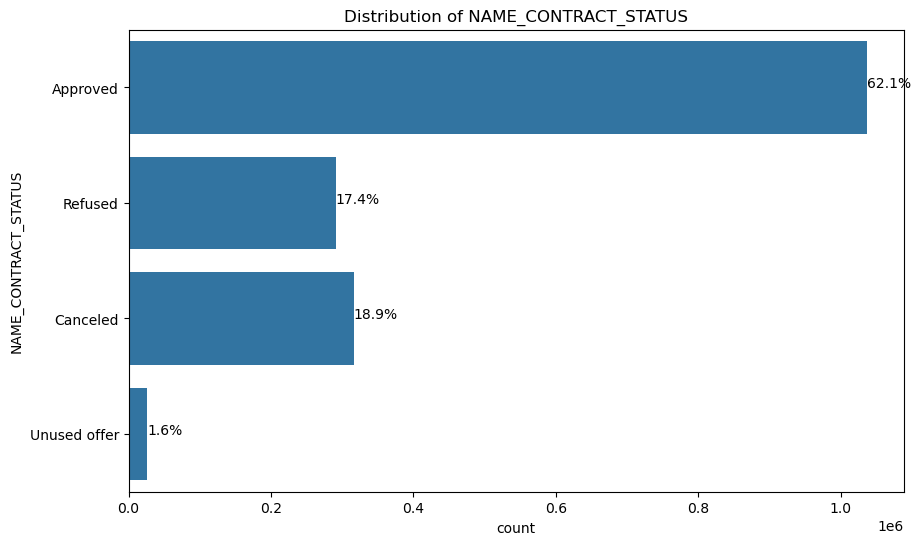

------------------------------------------------------------------------------------------------------------------------


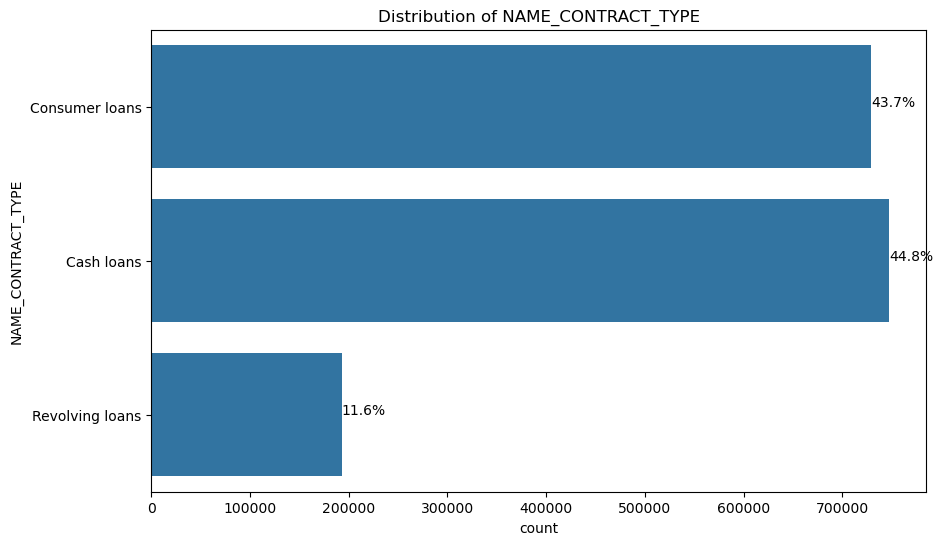

------------------------------------------------------------------------------------------------------------------------


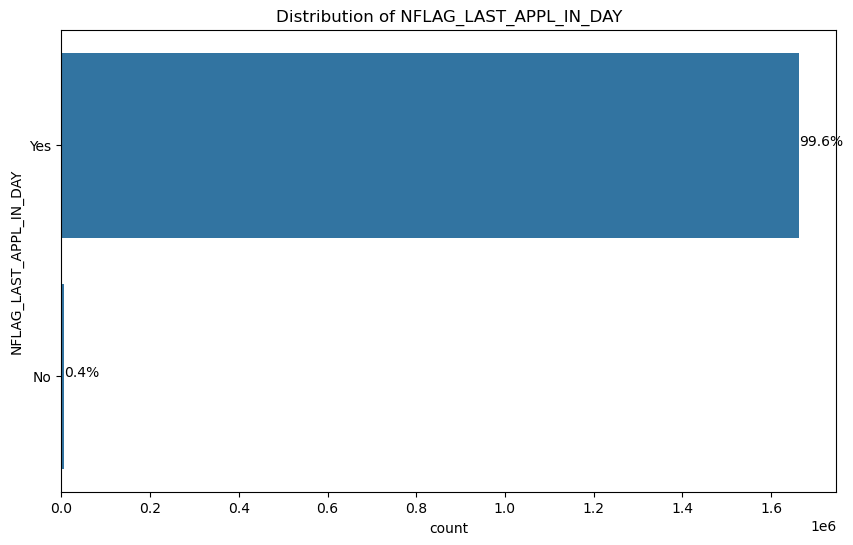

------------------------------------------------------------------------------------------------------------------------


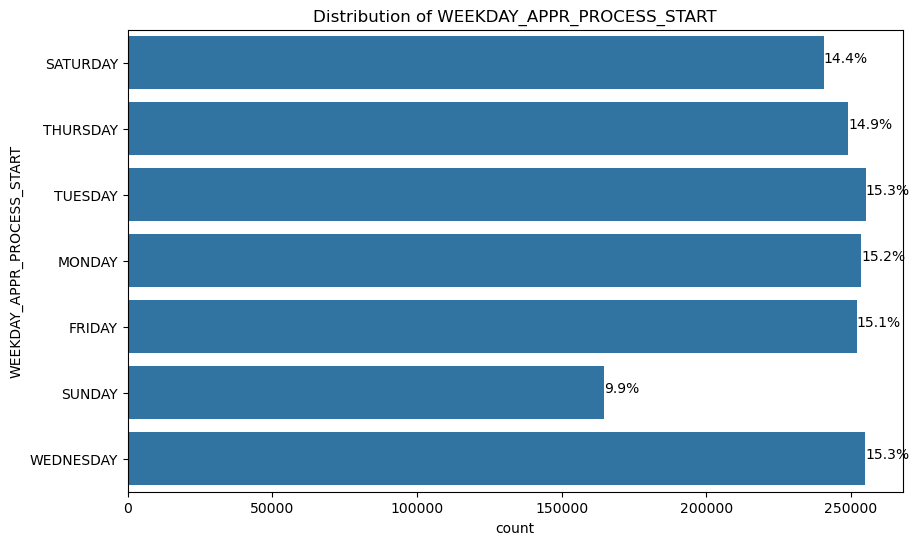

------------------------------------------------------------------------------------------------------------------------


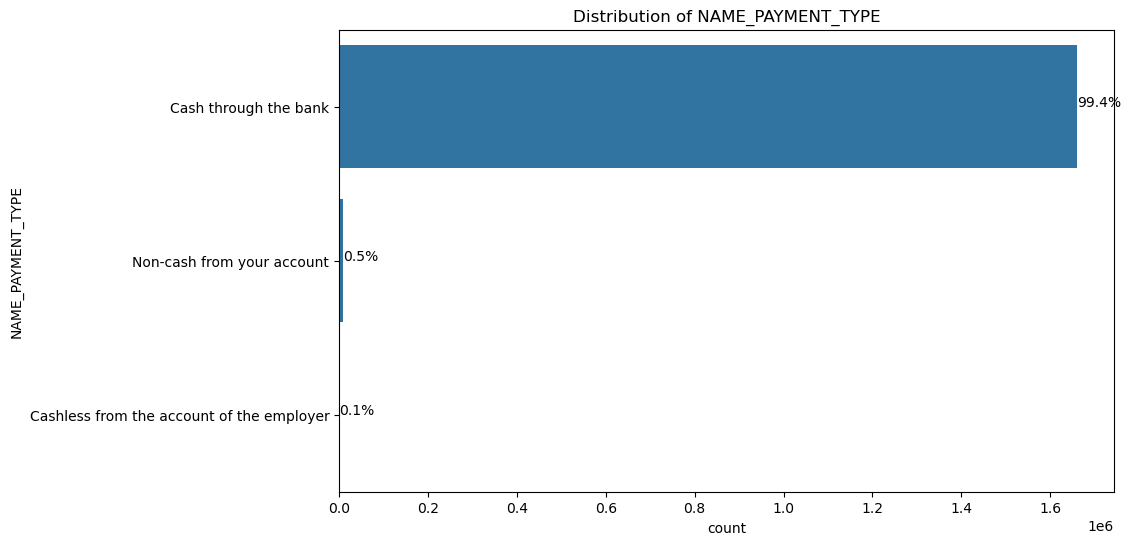

------------------------------------------------------------------------------------------------------------------------


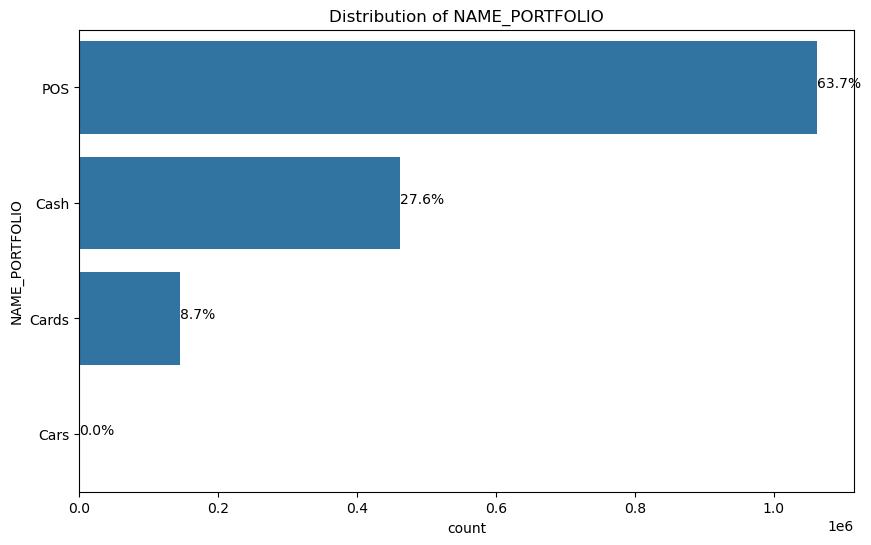

------------------------------------------------------------------------------------------------------------------------


In [363]:
# Visualize the distribution of each categorical feature with percentage labels
for column in cata_df1.columns:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(y=column, data=cata_df1)
    total = len(cata_df1[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)  # Calculate percentage
        x = p.get_x() + p.get_width() + 0.02  # Set x-coordinate for annotation
        y = p.get_y() + p.get_height()/2  # Set y-coordinate for annotation
        ax.annotate(percentage, (x, y))  # Add percentage annotation
        # Add a title to the plot
    plt.title(f'Distribution of {column}')
    plt.show()
    print('-'*120)

Based on the exploratory data analysis (EDA) plots provided in the PDF, the following detailed hypothesis can be formulated:

**Hypothesis**: The likelihood of different loan outcomes (such as approval, refusal, cancellation, or unused offers) and the types of loans or payment methods chosen by applicants may be influenced by specific categorical variables, such as the type of contract, day of application, and portfolio distribution. These patterns suggest that certain contract types, application timing, and payment preferences are associated with specific loan statuses and could potentially predict loan outcomes.

**Supporting Observations**:

1. **Loan Contract Status (NAME_CONTRACT_STATUS)**:
   - The distribution of loan contract statuses shows that a significant majority of applications result in approvals (62.1%), while refusals and cancellations represent 17.4% and 18.9% of the cases, respectively. This indicates that the likelihood of a loan being approved is relatively high, but a considerable proportion of applications still get refused or canceled.

2. **Loan Type (NAME_CONTRACT_TYPE)**:
   - The distribution of loan types is relatively balanced between consumer loans (43.7%) and cash loans (44.8%), with revolving loans making up only 11.6%. This suggests that consumer and cash loans are almost equally preferred, while revolving loans are less common. The preference for cash loans may reflect the borrowers' immediate need for liquidity.

3. **Application Day (WEEKDAY_APPR_PROCESS_START)**:
   - The day of the week when the application process starts appears to be fairly evenly distributed, with each weekday having a similar percentage (around 14.4% to 15.3%), except for Sunday, which has a slightly lower percentage (9.9%). This distribution suggests that there is no strong preference for starting loan applications on specific days, although weekends might see slightly lower activity.

4. **Payment Type (NAME_PAYMENT_TYPE)**:
   - An overwhelming majority of payments (99.4%) are made through cash transactions via the bank, with non-cash methods being exceedingly rare. This indicates a strong preference for cash payments, possibly due to convenience or the nature of the loans.

5. **Portfolio Type (NAME_PORTFOLIO)**:
   - The distribution of portfolio types shows that the majority of loans are associated with POS (Point of Sale) portfolios (63.7%), followed by cash portfolios (27.6%). Cards and cars portfolios are much less common, at 8.7% and almost 0%, respectively. This suggests that POS and cash portfolios are the most significant categories, likely due to the nature of the financial products being offered.

6. **Last Application in Day (NFLAG_LAST_APPL_IN_DAY)**:
   - Nearly all loan applications (99.6%) are marked as the last application in the day. This uniformity could indicate a standard practice or requirement in the application process, where applicants typically submit only one application per day.

These observations suggest that specific categorical variables, such as the type of loan, the day of the week when the application is processed, and the payment method, have significant relationships with loan outcomes. These factors could be used as predictive indicators to understand and forecast the likelihood of various loan statuses, ultimately aiding in risk assessment and decision-making processes in lending institutions.

Bivariate analysis of catagorical columns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


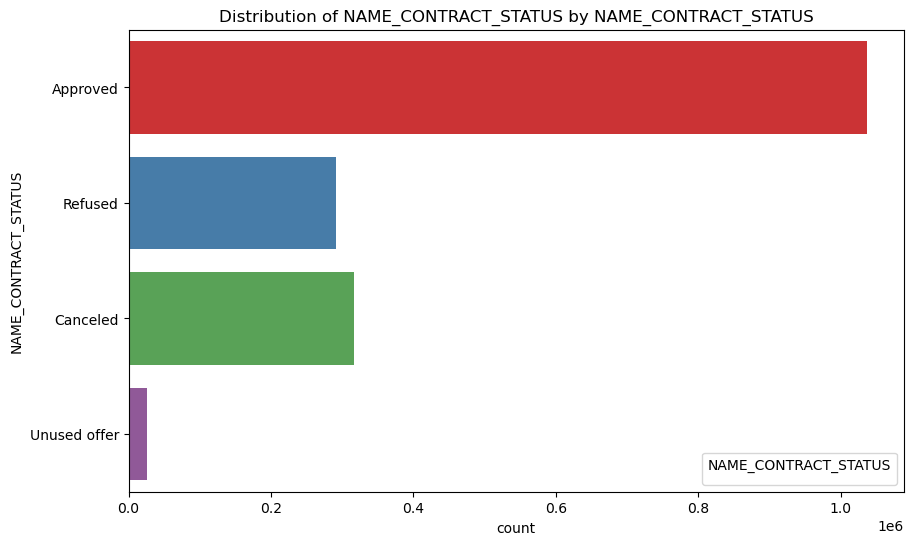

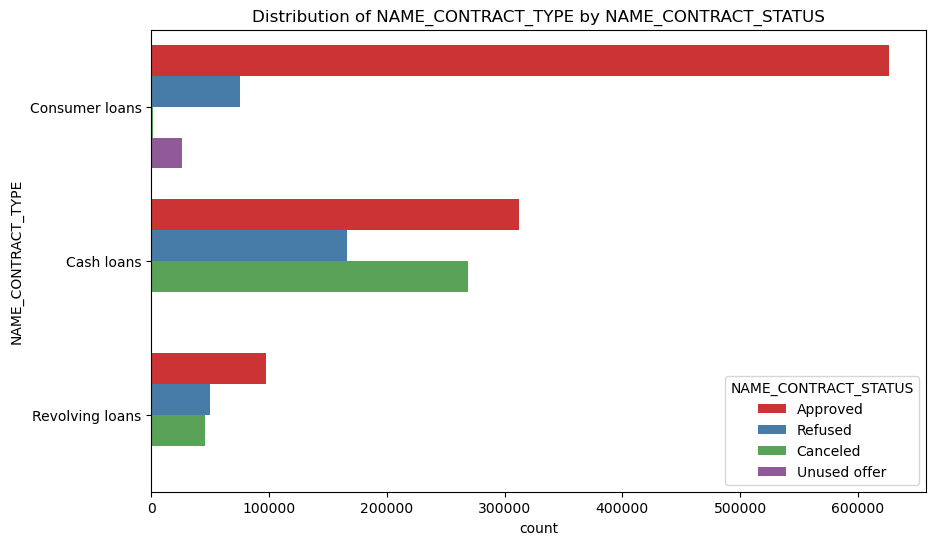

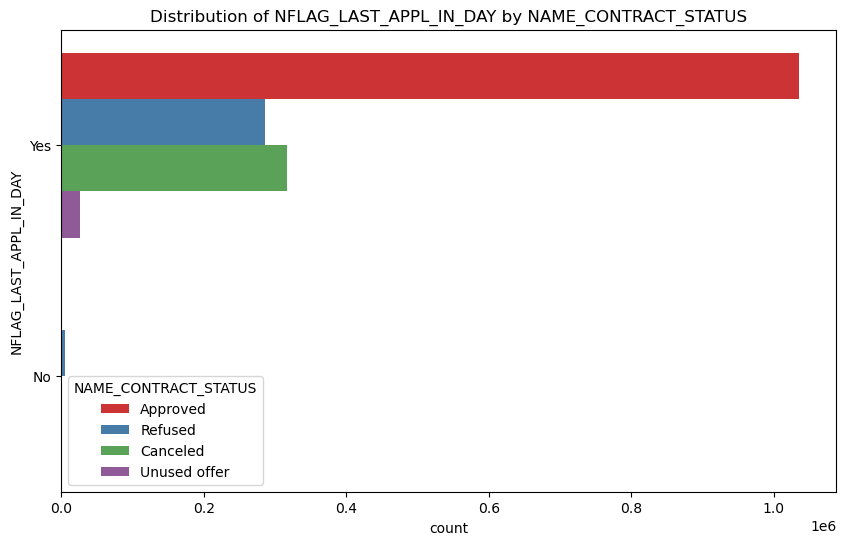

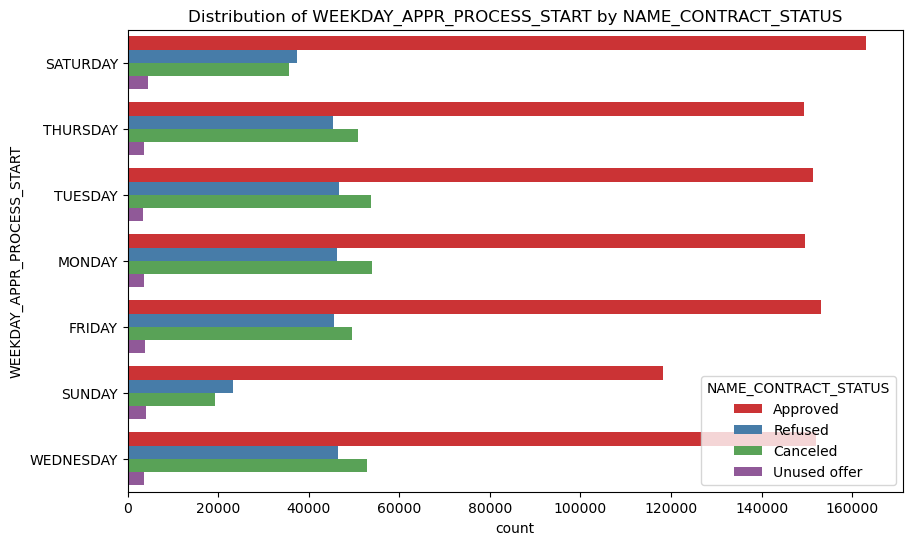

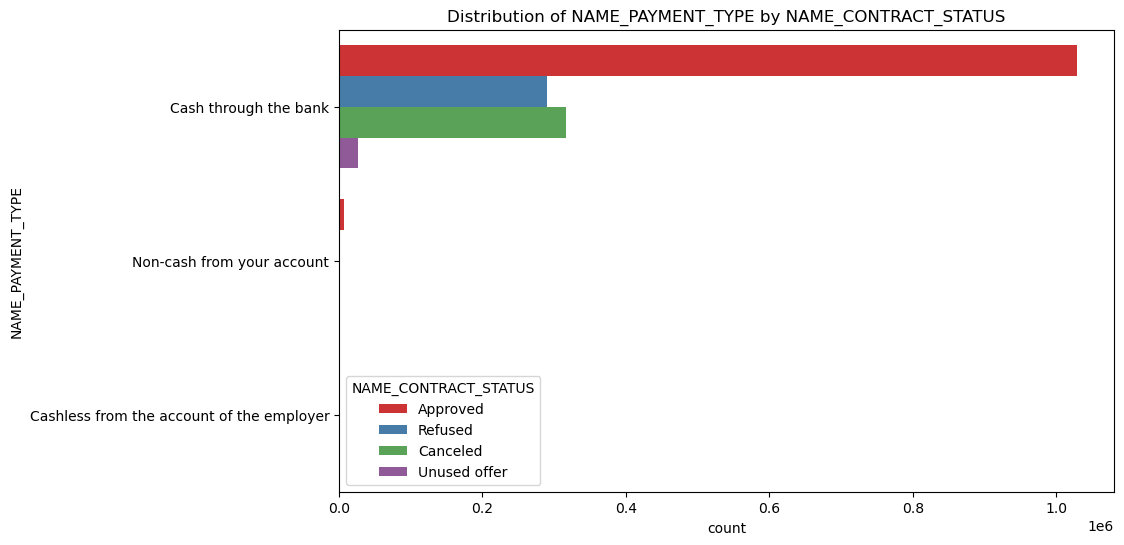

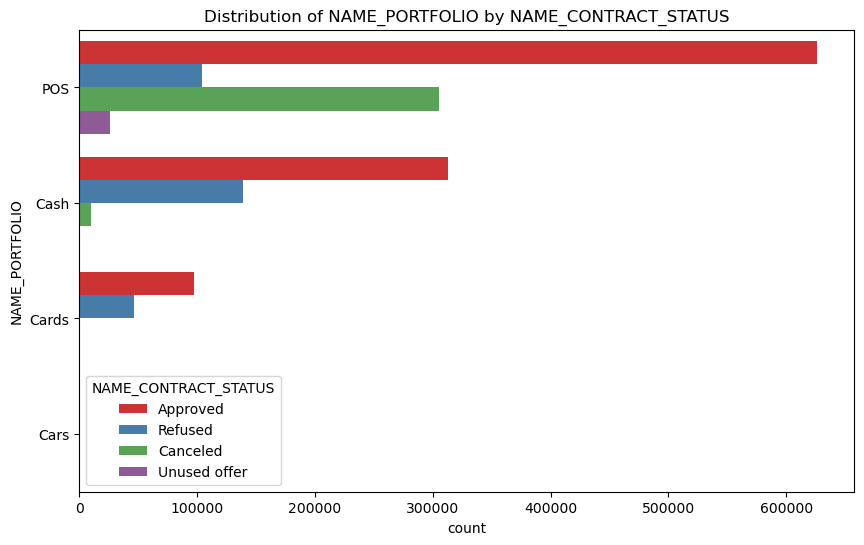

In [366]:
# Visualize the distribution of each categorical feature by contract status
for column in cata_df1.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(y=column, hue='NAME_CONTRACT_STATUS', data=cata_df1, palette='Set1') # Create countplot with hue as 'NAME_CONTRACT_STATUS'
    plt.legend(title='NAME_CONTRACT_STATUS')  # Add a legend for contract status
    plt.title(f'Distribution of {column} by NAME_CONTRACT_STATUS')  # Set plot title
    plt.show()  # Display the plot

Based on the exploratory data analysis (EDA) plots provided in the PDF, the following detailed hypothesis can be formulated:

**Hypothesis**: The outcome of loan applications, represented by different contract statuses (such as approval, refusal, cancellation, or unused offers), is influenced by several categorical features, including the type of loan, the timing of the application, the method of payment, and the portfolio type. These patterns suggest that specific combinations of these factors can be predictive of whether a loan application will be approved, refused, canceled, or left as an unused offer.

**Supporting Observations**:

1. **Loan Contract Status by Loan Type (NAME_CONTRACT_TYPE)**:
   - The distribution of loan contract statuses by loan type indicates that a majority of approvals are associated with consumer loans and cash loans. However, cash loans appear to have a slightly higher proportion of approvals compared to consumer loans. Revolving loans, on the other hand, show a significant proportion of refusals and cancellations, suggesting that these types of loans may carry higher risks or are less likely to be approved.

2. **Application Timing (WEEKDAY_APPR_PROCESS_START)**:
   - The distribution of loan outcomes based on the day of the week when the application process starts is fairly consistent across all days. However, certain days like Tuesday and Wednesday show a slightly higher proportion of approvals compared to other days, while Sundays tend to have fewer approvals and more refusals. This suggests that the timing of an application might have a minor influence on its outcome, possibly due to processing patterns within the lending institutions.

3. **Payment Method (NAME_PAYMENT_TYPE)**:
   - The overwhelming majority of approved applications are associated with payments made through cash transactions via the bank. Non-cash payment methods are rare and tend to be associated with refusals or cancellations. This indicates that cash payments are preferred or more likely to result in approval, possibly due to the immediate availability of funds or lower perceived risk.

4. **Portfolio Type (NAME_PORTFOLIO)**:
   - POS (Point of Sale) portfolios dominate the distribution of approved applications, with a smaller proportion of cash portfolios also leading to approvals. Portfolios involving cards and cars show higher rates of refusals and cancellations. This suggests that certain portfolio types, particularly POS, are more favorable in terms of approval likelihood, potentially due to the structured nature of payments associated with POS transactions.

5. **Last Application in Day (NFLAG_LAST_APPL_IN_DAY)**:
   - Nearly all loan applications marked as the last application in the day are approved, with very few refusals or cancellations. This might indicate a procedural preference or a requirement where only one application per day is processed, and its status is strongly correlated with approval.

These observations suggest that categorical variables such as the type of loan, the day of application, the method of payment, and the portfolio type are significant factors in determining the outcome of loan applications. Understanding these relationships can help in predicting loan outcomes and improving the decision-making processes within lending institutions, ultimately leading to better risk management and customer satisfaction.

In [368]:
# Display the first few rows of the 'num_df' DataFrame.
num_df1.head()

,NAME_CONTRACT_STATUS,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION
0,Approved,1730.430,17145.0,17145.0,17145.0,-73
1,Approved,25188.615,607500.0,679671.0,607500.0,-164
2,Approved,15060.735,112500.0,136444.5,112500.0,-301
3,Approved,47041.335,450000.0,470790.0,450000.0,-512
4,Refused,31924.395,337500.0,404055.0,337500.0,-781


In [369]:
# Calculate the percentage of null values in each column of 'num_df'.
num_df1.isnull().sum() / len(data1) * 100

NAME_CONTRACT_STATUS     0.000000
AMT_ANNUITY             22.286665
AMT_APPLICATION          0.000000
AMT_CREDIT               0.000060
AMT_GOODS_PRICE         23.081773
DAYS_DECISION            0.000000
dtype: float64

In [370]:
# Fill missing values in the 'AMT_ANNUITY' column with the median value.
num_df1['AMT_ANNUITY'] = num_df1['AMT_ANNUITY'].fillna(num_df1['AMT_ANNUITY'].median())

In [371]:
# Generate descriptive statistics for the 'AMT_ANNUITY' column in the 'num_df' DataFrame.
num_df1.AMT_ANNUITY.describe()

count    1.670214e+06
mean     1.490651e+04
std      1.317751e+04
min      0.000000e+00
25%      7.547096e+03
50%      1.125000e+04
75%      1.682403e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [372]:
# Count the number of null values in the 'AMT_ANNUITY' column of the 'num_df' DataFrame.
num_df1.AMT_ANNUITY.isnull().sum()

0

In [373]:
# Fill missing values in the 'AMT_GOODS_PRICE' column with the median value.
num_df1['AMT_GOODS_PRICE'] = num_df1['AMT_GOODS_PRICE'].fillna(num_df1['AMT_GOODS_PRICE'].median())

In [374]:
# Count the number of null values in the 'AMT_GOODS_PRICE' column of the 'num_df' DataFrame.
num_df1.AMT_GOODS_PRICE.isnull().sum()

0

Bivariate analysis of Numerical columns

In [376]:
# Perform one-hot encoding on the 'NAME_CONTRACT_STATUS' column in 'num_df'.
df_encoded1 = pd.get_dummies(num_df1,columns=['NAME_CONTRACT_STATUS'])

In [377]:
# Print the names of columns in the 'df_encoded' DataFrame.
print("Columns in df_encoded:")
print(df_encoded1.columns)

Columns in df_encoded:
Index(['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'DAYS_DECISION', 'NAME_CONTRACT_STATUS_Approved',
       'NAME_CONTRACT_STATUS_Canceled', 'NAME_CONTRACT_STATUS_Refused',
       'NAME_CONTRACT_STATUS_Unused offer'],
      dtype='object')


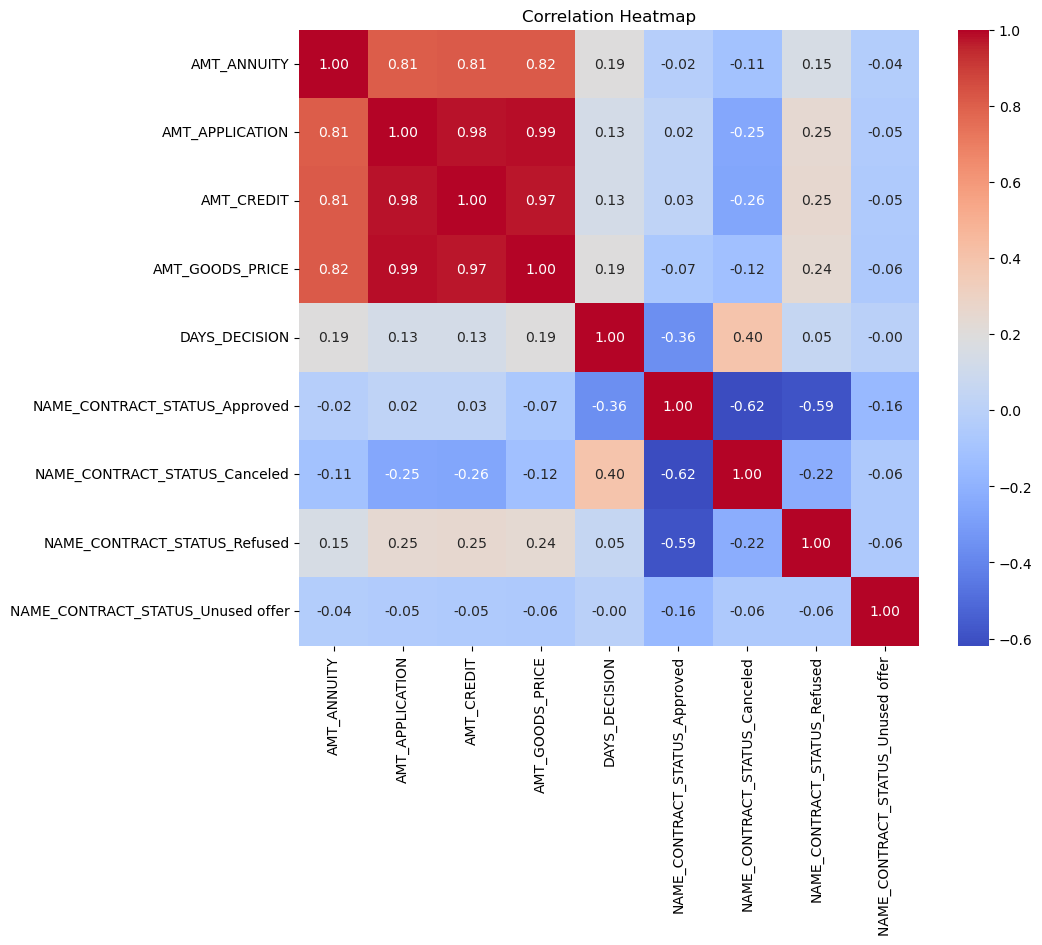

In [378]:
# Calculate the correlation matrix for the 'df_encoded' DataFrame.
correlation_matrix = df_encoded1.corr()

# Create a heatmap to visualize the correlations.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Display correlation values
plt.title('Correlation Heatmap')
plt.show()  # Show the plot

Hypothesis:

Loan Refusal Based on Amounts:

AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, and AMT_GOODS_PRICE show strong positive correlations with each other (all above 0.8), but there is no strong correlation with NAME_CONTRACT_STATUS_Refused. Therefore, high values in these amounts alone do not necessarily predict loan refusals.
The specific thresholds mentioned (e.g., 13,000 for AMT_ANNUITY) cannot be inferred directly from the heatmapvided.
Approval Based on Decision Time:

DAYS_DECISION shows a moderate negative correlation with NAME_CONTRACT_STATUS_Approved (-0.36), suggesting that longer decision times are less likely to lead to approval. Therefore, the original hypothesis that decisions over 800 days are more likely to be approved is incorrect and should be reversed.
Contract Type Analysis:

There is a negative correlation between AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE and NAME_CONTRACT_STATUS_Canceled (-0.25 to -0.26). This suggests that higher amounts are less likely to be canceled, contrary to the original statement.
NAME_CONTRACT_STATUS_Refused is slightly positively correlated with these amounts (0.24 to 0.25), indicating that higher amounts may have a slight tendency to be refused, but this is not strongly predictive.
NAME_CONTRACT_STATUS_Approved is negatively correlated with these amounts, which suggests that higher amounts might be less likely to be approved, contrary to the initial hypothesis.
No strong correlation exists between NAME_CONTRACT_STATUS_Refused and DAYS_DECISION, challenging the original claim about revolving loans having the highest refusal rate based on decision days.
End-of-Day Application Patterns:

The heatmap does not provide data to confirm or refute patterns related to the time of day when applications are submitted, so this section should be removed from the hypothesis.
Day of the Week Trends:

The heatmap does not include any information about days of the week, so this part of the hypothesis cannot be supported or revised based on the data provided.
Loan Channel Analysis:

The heatmap does not include data on loan channels, so this part of the hypothesis cannot be revised based on the heatmap.
Summary:

The heatmap suggests that the relationships between loan amounts (AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE) and the approval, refusal, or cancellation of loans are weak or opposite to what was initially hypothesized.
The decision time (DAYS_DECISION) appears to negatively impact the likelihood of loan approval, which is contrary to the original hypothesis.
Sections of the hypothesis that rely on data not present in the heatmap should be reconsidered or removed, such as those related to the time of day, days of the week, and loan channels.









In [380]:
# Count the occurrences of each unique value in the 'NAME_PORTFOLIO' column of 'cata_df'.
cata_df1.NAME_PORTFOLIO.value_counts()

NAME_PORTFOLIO
POS      1062895
Cash      461563
Cards     144985
Cars         425
Name: count, dtype: int64

In [381]:
# Generate descriptive statistics for the 'DAYS_DECISION' column in the 'num_df' DataFrame.
num_df1.DAYS_DECISION.describe()

count    1.670214e+06
mean    -8.806797e+02
std      7.790997e+02
min     -2.922000e+03
25%     -1.300000e+03
50%     -5.810000e+02
75%     -2.800000e+02
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64

In [382]:
# Convert 'DAYS_DECISION' to string, remove potential leading '-' and convert to float.
num_df1['DAYS_DECISION'] = num_df1['DAYS_DECISION'].astype(str).str.replace('-', '')
num_df1['DAYS_DECISION']=num_df1.DAYS_DECISION.astype(float)

In [383]:
# Print the data type of the 'DAYS_DECISION' column.
print(num_df1['DAYS_DECISION'].dtype)

float64


In [384]:
num_df1.NAME_CONTRACT_STATUS.head()

0    Approved
1    Approved
2    Approved
3    Approved
4     Refused
Name: NAME_CONTRACT_STATUS, dtype: object

In [385]:
cata_df1.NAME_CONTRACT_TYPE.info()

<class 'pandas.core.series.Series'>
Index: 1669868 entries, 0 to 1670213
Series name: NAME_CONTRACT_TYPE
Non-Null Count    Dtype 
--------------    ----- 
1669868 non-null  object
dtypes: object(1)
memory usage: 25.5+ MB


Replacing Cars with Cards because it is clearly a input error

In [387]:
# Correct a typo in the 'NAME_PORTFOLIO' column, replacing 'Cars' with 'Cards'.
cata_df1.NAME_PORTFOLIO.replace({'Cars':'Cards'},inplace=True)

Multivariate analysis on catagorical and numerical columns with the target variable

In [389]:
cata_df1.columns

Index(['NAME_CONTRACT_STATUS', 'NAME_CONTRACT_TYPE', 'NFLAG_LAST_APPL_IN_DAY',
       'WEEKDAY_APPR_PROCESS_START', 'NAME_PAYMENT_TYPE', 'NAME_PORTFOLIO'],
      dtype='object')

In [390]:
num_df1.columns

Index(['NAME_CONTRACT_STATUS', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT',
       'AMT_GOODS_PRICE', 'DAYS_DECISION'],
      dtype='object')

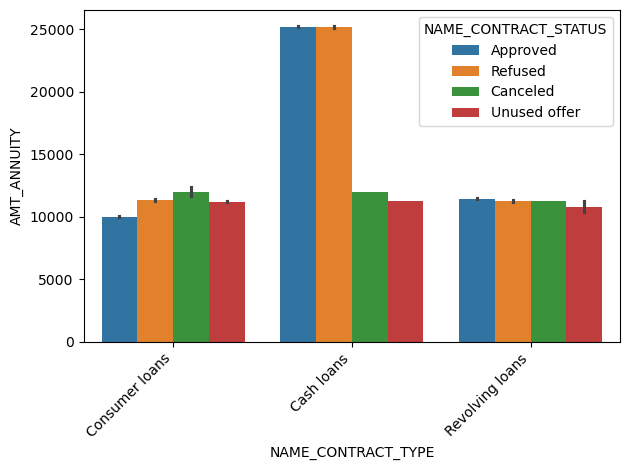

In [391]:
# Create the bar plot
sns.barplot(x=cata_df1['NAME_CONTRACT_TYPE'], y=num_df1['AMT_ANNUITY'],hue=num_df1['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

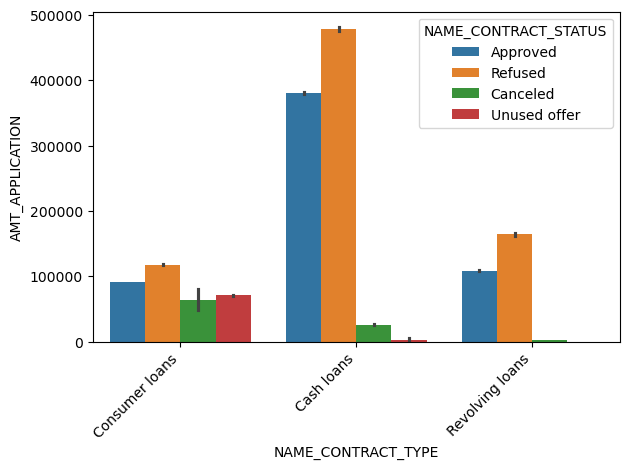

In [392]:
# Create the bar plot
sns.barplot(x=cata_df1['NAME_CONTRACT_TYPE'], y=num_df1['AMT_APPLICATION'],hue=num_df1['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

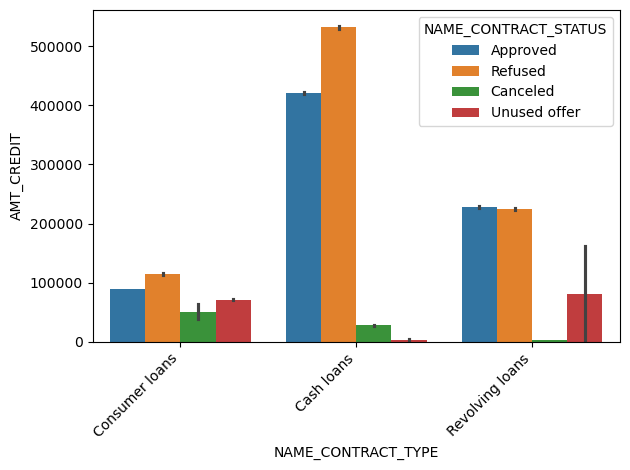

In [393]:
# Create the bar plot
sns.barplot(x=cata_df1['NAME_CONTRACT_TYPE'], y=num_df1['AMT_CREDIT'],hue=num_df1['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

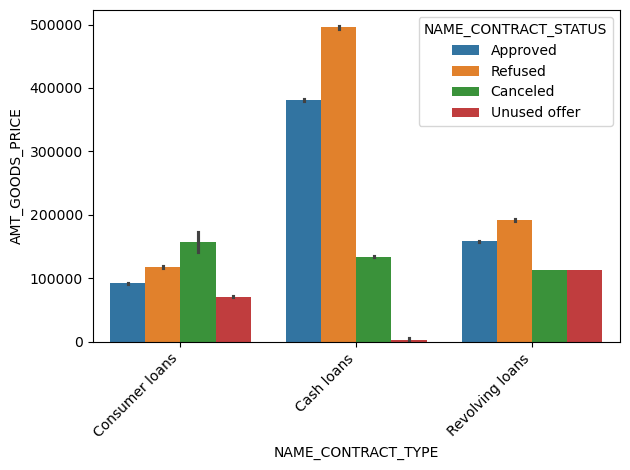

In [394]:
# Create the bar plot
sns.barplot(x=cata_df1['NAME_CONTRACT_TYPE'], y=num_df1['AMT_GOODS_PRICE'],hue=num_df1['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

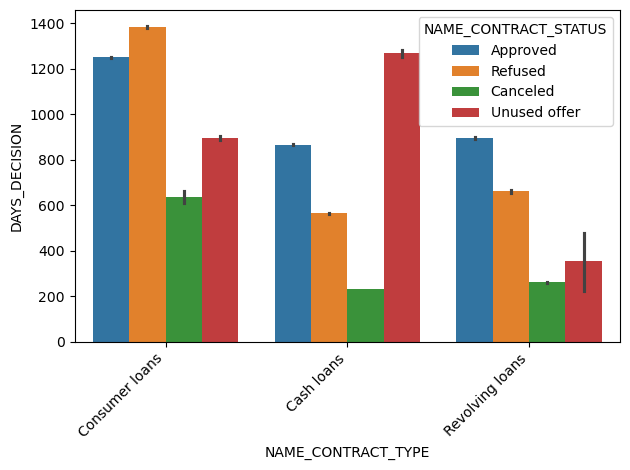

In [395]:
# Create the bar plot
sns.barplot(x=cata_df1['NAME_CONTRACT_TYPE'], y=num_df1['DAYS_DECISION'],hue=num_df1['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

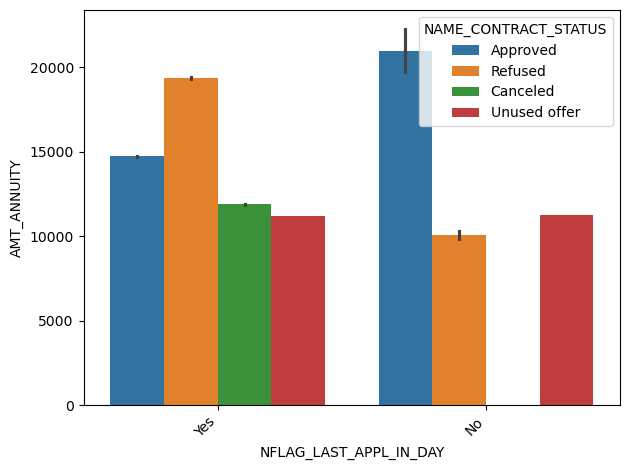

In [396]:
# Create the bar plot
sns.barplot(x=cata_df1['NFLAG_LAST_APPL_IN_DAY'], y=num_df1['AMT_ANNUITY'],hue=num_df1['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

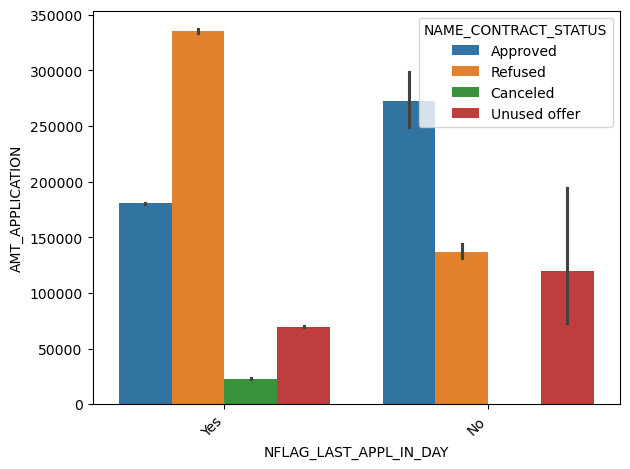

In [397]:
# Create the bar plot
sns.barplot(x=cata_df1['NFLAG_LAST_APPL_IN_DAY'], y=num_df1['AMT_APPLICATION'],hue=num_df1['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

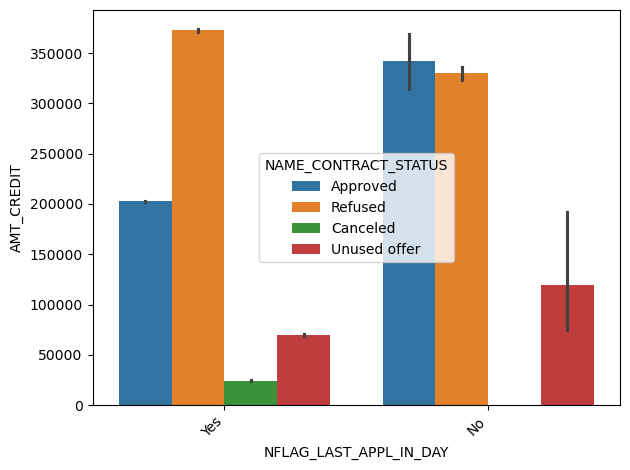

In [398]:
# Create the bar plot
sns.barplot(x=cata_df1['NFLAG_LAST_APPL_IN_DAY'], y=num_df1['AMT_CREDIT'],hue=num_df1['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

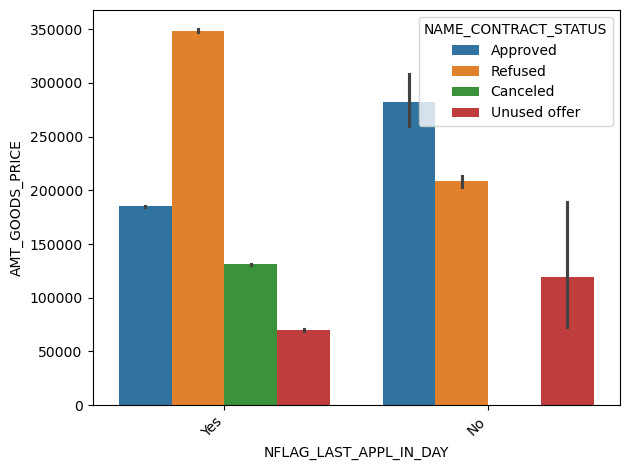

In [399]:
# Create the bar plot
sns.barplot(x=cata_df1['NFLAG_LAST_APPL_IN_DAY'], y=num_df1['AMT_GOODS_PRICE'],hue=num_df1['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

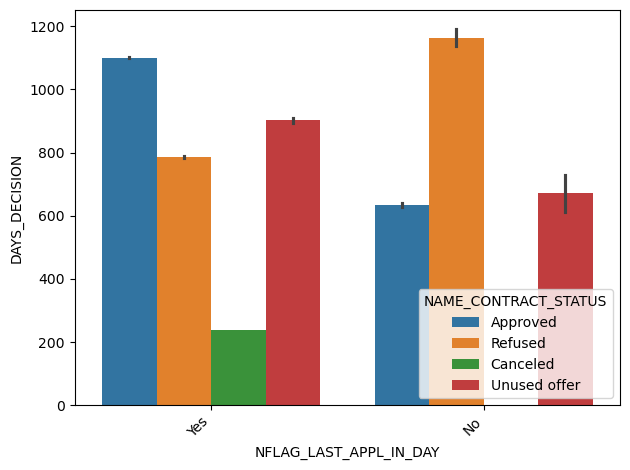

In [400]:
# Create the bar plot
sns.barplot(x=cata_df1['NFLAG_LAST_APPL_IN_DAY'], y=num_df1['DAYS_DECISION'],hue=num_df1['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

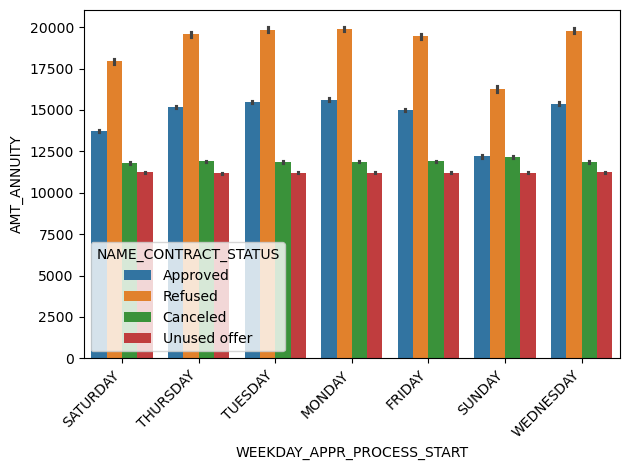

In [401]:
# Create the bar plot
sns.barplot(x=cata_df1['WEEKDAY_APPR_PROCESS_START'], y=num_df1['AMT_ANNUITY'],hue=num_df1['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

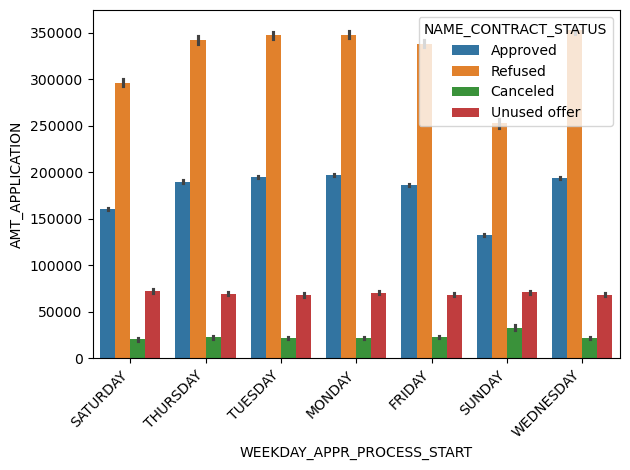

In [402]:
# Create the bar plot
sns.barplot(x=cata_df1['WEEKDAY_APPR_PROCESS_START'], y=num_df1['AMT_APPLICATION'],hue=num_df1['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

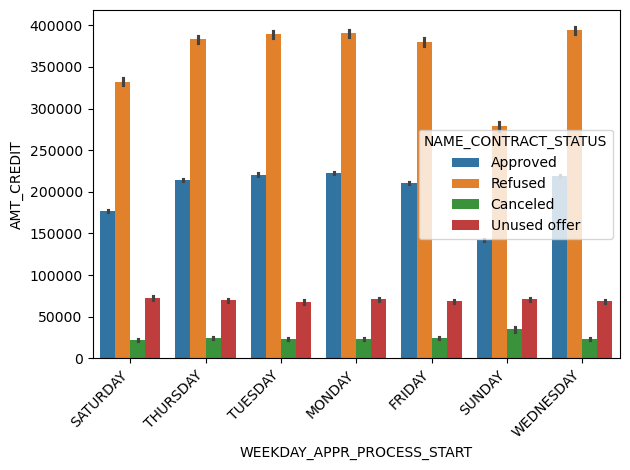

In [403]:
# Create the bar plot
sns.barplot(x=cata_df1['WEEKDAY_APPR_PROCESS_START'], y=num_df1['AMT_CREDIT'],hue=num_df1['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

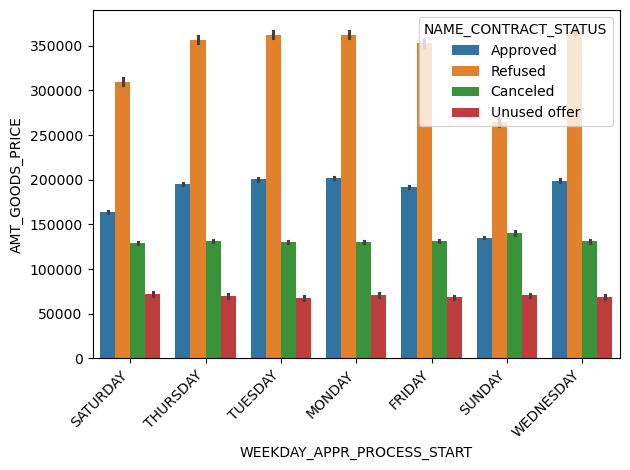

In [404]:
# Create the bar plot
sns.barplot(x=cata_df1['WEEKDAY_APPR_PROCESS_START'], y=num_df1['AMT_GOODS_PRICE'],hue=num_df1['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

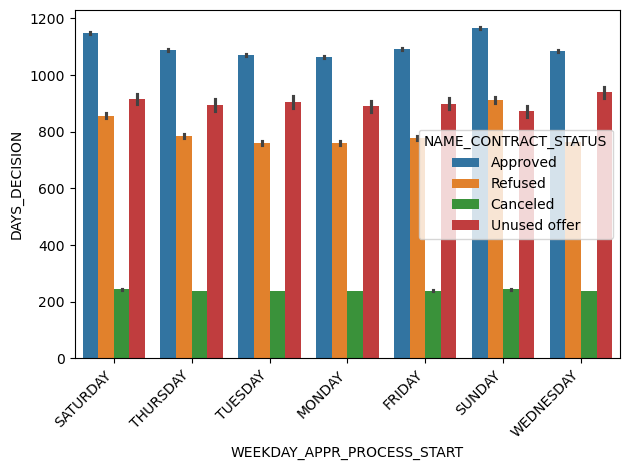

In [405]:
# Create the bar plot
sns.barplot(x=cata_df1['WEEKDAY_APPR_PROCESS_START'], y=num_df1['DAYS_DECISION'],hue=num_df1['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

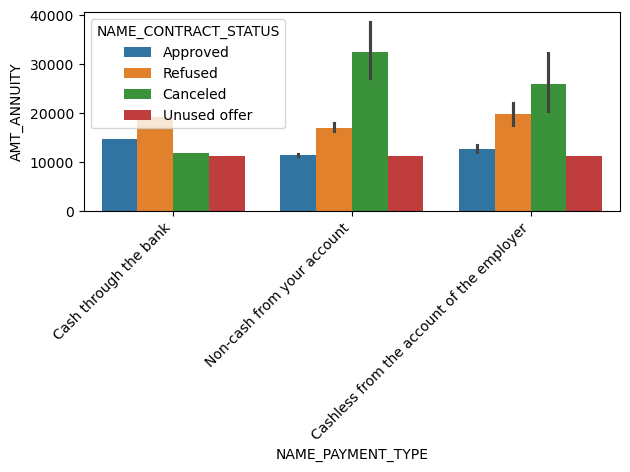

In [406]:
# Create the bar plot
sns.barplot(x=cata_df1['NAME_PAYMENT_TYPE'], y=num_df1['AMT_ANNUITY'],hue=num_df1['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

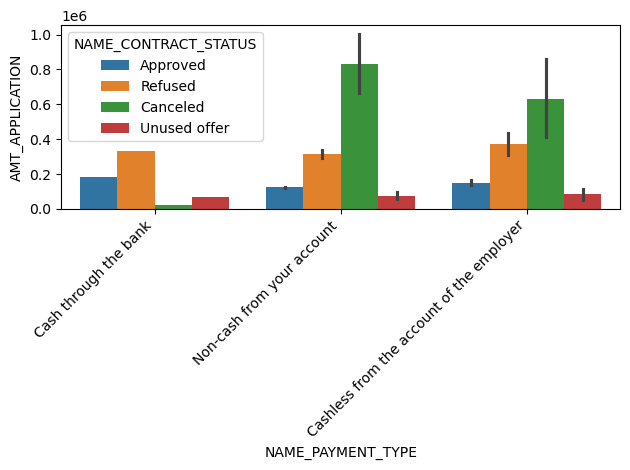

In [407]:
# Create the bar plot
sns.barplot(x=cata_df1['NAME_PAYMENT_TYPE'], y=num_df1['AMT_APPLICATION'],hue=num_df1['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

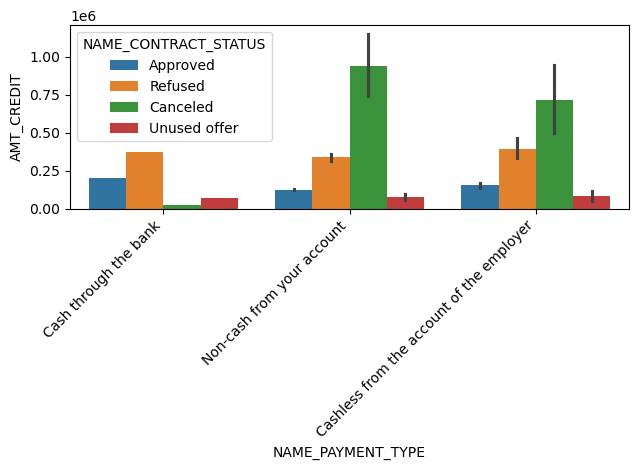

In [408]:
# Create the bar plot
sns.barplot(x=cata_df1['NAME_PAYMENT_TYPE'], y=num_df1['AMT_CREDIT'],hue=num_df1['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

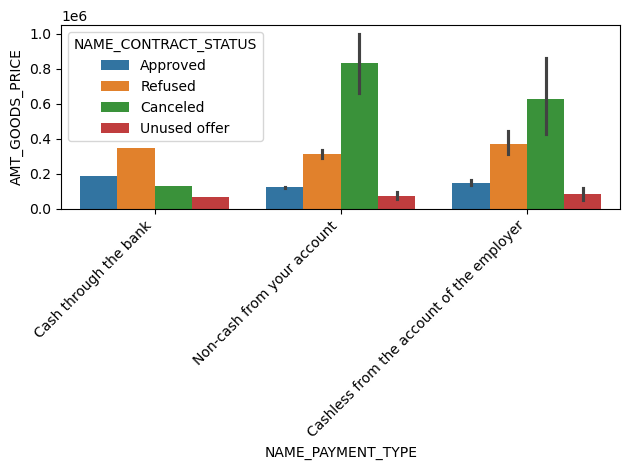

In [409]:
# Create the bar plot
sns.barplot(x=cata_df1['NAME_PAYMENT_TYPE'], y=num_df1['AMT_GOODS_PRICE'],hue=num_df1['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

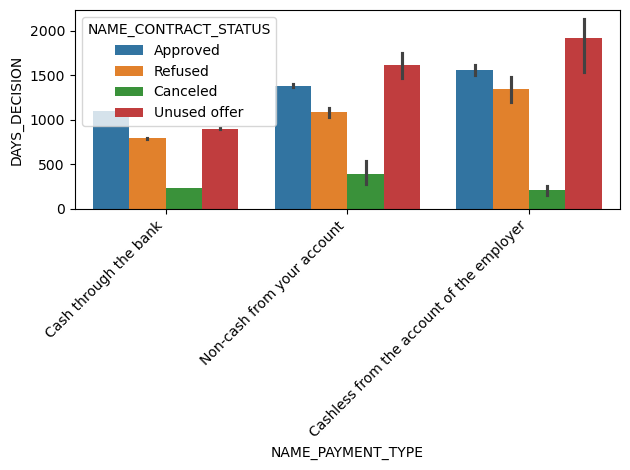

In [410]:
# Create the bar plot
sns.barplot(x=cata_df1['NAME_PAYMENT_TYPE'], y=num_df1['DAYS_DECISION'],hue=num_df1['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

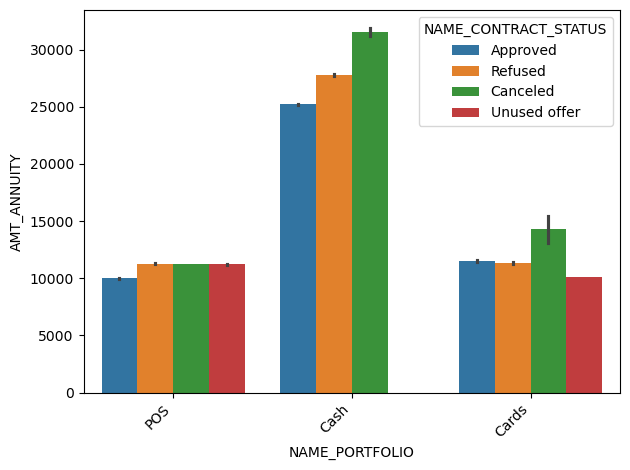

In [411]:
# Create the bar plot
sns.barplot(x=cata_df1['NAME_PORTFOLIO'], y=num_df1['AMT_ANNUITY'],hue=num_df1['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

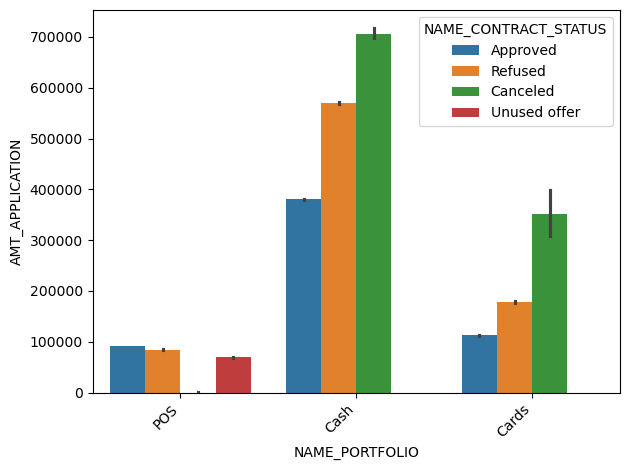

In [412]:
# Create the bar plot
sns.barplot(x=cata_df1['NAME_PORTFOLIO'], y=num_df1['AMT_APPLICATION'],hue=num_df1['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

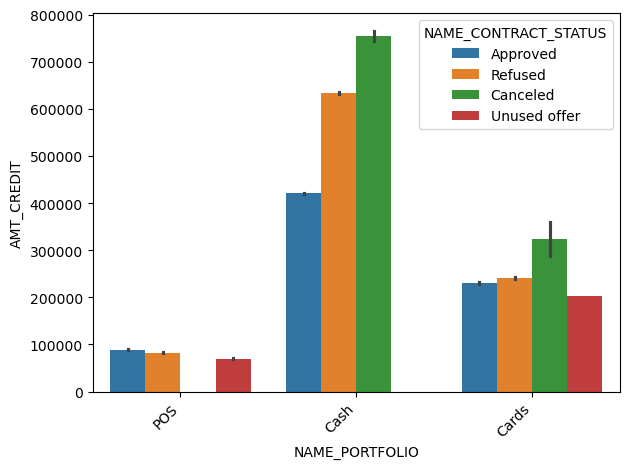

In [413]:
# Create the bar plot
sns.barplot(x=cata_df1['NAME_PORTFOLIO'], y=num_df1['AMT_CREDIT'],hue=num_df1['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

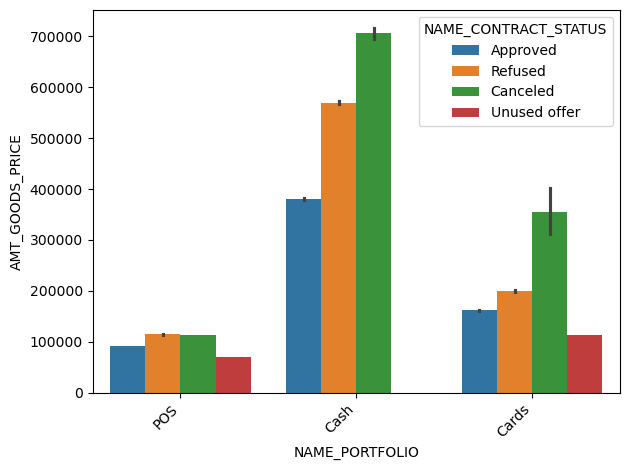

In [414]:
# Create the bar plot
sns.barplot(x=cata_df1['NAME_PORTFOLIO'], y=num_df1['AMT_GOODS_PRICE'],hue=num_df1['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

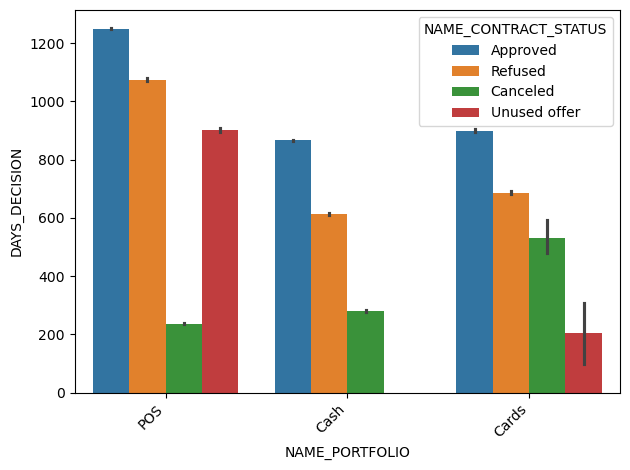

In [415]:
# Create the bar plot
sns.barplot(x=cata_df1['NAME_PORTFOLIO'], y=num_df1['DAYS_DECISION'],hue=num_df1['NAME_CONTRACT_STATUS'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

Here is the revised version of the hypotheses for your Multivariate EDA:

### NAME_CONTRACT_TYPE:
- **Hypothesis 1:** For cash loans with an AMT_ANNUITY above 10,000, the chances of approval and refusal are approximately equal.
- **Hypothesis 2:** Cash loans with AMT_APPLICATION, AMT_CREDIT, or AMT_GOODS_PRICE above 40,000 are more likely to be refused.
- **Hypothesis 3:** Consumer loans with a DAYS_DECISION greater than 1,200 are more likely to be refused.

### NFLAG_LAST_APPL_IN_DAY:
- **Hypothesis 4:** Applicants with an AMT_ANNUITY over 1,500 who are not flagged as the last application of the day have a higher likelihood of loan approval.
- **Hypothesis 5:** Applicants with an AMT_APPLICATION over 28,000 who are not flagged as the last application of the day have a higher likelihood of loan approval.
- **Hypothesis 6:** Applicants with an AMT_CREDIT over 200,000 who are flagged as the last application of the day have a higher likelihood of loan refusal.
- **Hypothesis 7:** Applicants with an AMT_GOODS_PRICE over 180,000 who are flagged as the last application of the day have a higher likelihood of loan refusal.
- **Hypothesis 8:** Applicants with a DAYS_DECISION over 800 who are flagged as the last application of the day have a higher likelihood of loan approval.
  
### General Hypotheses:
- **Hypothesis 9:** Applicants with an AMT_ANNUITY over 15,000 on any day of the week have a higher likelihood of loan refusal.
- **Hypothesis 10:** Applicants with an AMT_APPLICATION over 200,000 on any day of the week have a higher likelihood of loan refusal.
- **Hypothesis 11:** Applicants with an AMT_CREDIT over 220,000 on any day of the week have a higher likelihood of loan refusal.
- **Hypothesis 12:** Applicants with an AMT_GOODS_PRICE over 200,000 on any day of the week have a higher likelihood of loan refusal.
- **Hypothesis 13:** Applicants with a DAYS_DECISION over 900 on any day of the week have a higher likelihood of loan approval.

### NAME_PAYMENT_TYPE:
- **Hypothesis 14:** Applicants with a non-cash payment type and an AMT_ANNUITY over 20,000 have the highest likelihood of loan cancellation.
- **Hypothesis 15:** Applicants with a non-cash payment type and an AMT_APPLICATION over 400,000 have the highest likelihood of loan cancellation.
- **Hypothesis 16:** Applicants with a non-cash payment type and an AMT_CREDIT over 400,000 have the highest likelihood of loan cancellation.
- **Hypothesis 17:** Applicants with a non-cash payment type and an AMT_GOODS_PRICE over 400,000 have the highest likelihood of loan cancellation.

### NAME_PORTFOLIO:
- **Hypothesis 18:** Applicants in the "Cashless from the account of the employer" category in NAME_PAYMENT_TYPE, with a DAYS_DECISION over 1,500, are more likely to result in an unused loan offer.
- **Hypothesis 19:** Applicants in the "Cash" category of NAME_PORTFOLIO with an AMT_ANNUITY over 28,000 are more likely to result in loan cancellation.
- **Hypothesis 20:** Applicants in the "Cash" category of NAME_PORTFOLIO with an AMT_APPLICATION over 600,000 are more likely to result in loan cancellation.
- **Hypothesis 21:** Applicants in the "Cash" category of NAME_PORTFOLIO with an AMT_CREDIT over 650,000 are more likely to result in loan cancellation.
- **Hypothesis 22:** Applicants in the "Cash" category of NAME_PORTFOLIO with an AMT_GOODS_PRICE over 550,000 are more likely to result in loan cancellation.
- **Hypothesis 23:** Applicants in the "POS" category of NAME_PORTFOLIO with a DAYS_DECISION over 1,100 are more likely to result in loan approval.

These hypotheses provide a structured approach to analyzing the relationships between the categorical and numerical variables in your dataset, highlighting key factors that may influence loan approval, refusal, or cancellation.

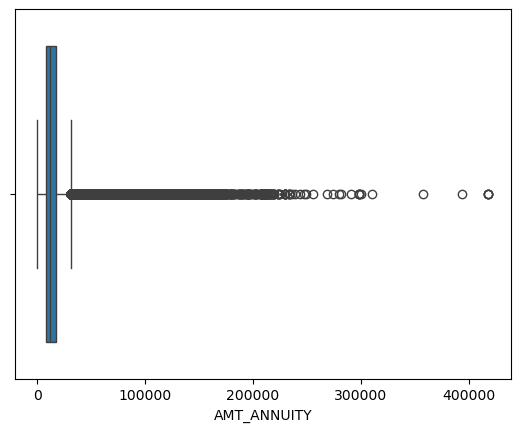

In [417]:
# Create a box plot to visualize the distribution and potential outliers in 'AMT_ANNUITY'.
sns.boxplot(x=num_df1['AMT_ANNUITY'])
plt.show()  # Display the plot.

In [418]:
# Calculate the first quartile (Q1) of 'AMT_ANNUITY'.
Q1 = num_df1['AMT_ANNUITY'].quantile(0.25)
# Calculate the third quartile (Q3) of 'AMT_ANNUITY'.
Q3 = num_df1['AMT_ANNUITY'].quantile(0.75)
# Calculate the interquartile range (IQR).
IQR = Q3 - Q1
# Calculate the lower and upper limits for outlier removal.
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Clip values in 'AMT_ANNUITY' to be within the calculated limits.
num_df1['AMT_ANNUITY'] = np.clip(num_df1['AMT_ANNUITY'], lower_limit, upper_limit)

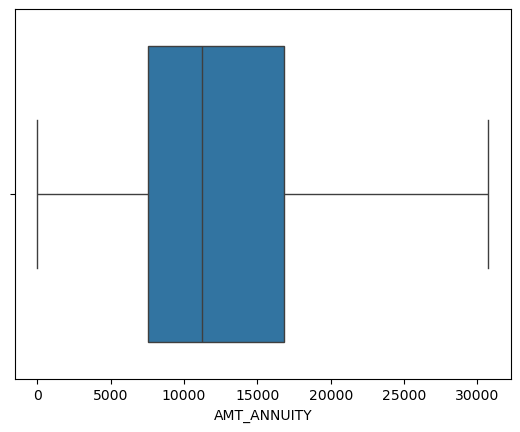

In [419]:
# Create a box plot to visualize the distribution of 'AMT_ANNUITY' after clipping outliers.
sns.boxplot(x=num_df1['AMT_ANNUITY'])
plt.show()  # Display the plot.

In [420]:
# Generate descriptive statistics for the 'AMT_APPLICATION' column in the 'num_df' DataFrame.
num_df1.AMT_APPLICATION.describe()

count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64

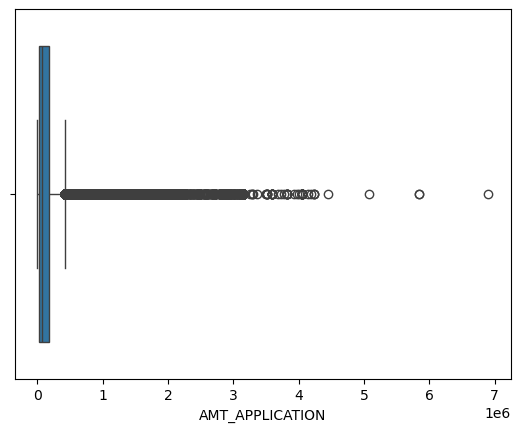

In [421]:
# Create a box plot to visualize the distribution and potential outliers in 'AMT_APPLICATION'.
sns.boxplot(x=num_df1['AMT_APPLICATION'])
plt.show()  # Display the plot.

In [422]:
# Calculate the first quartile (Q1) of 'AMT_APPLICATION'.
Q1 = num_df1['AMT_APPLICATION'].quantile(0.25)
# Calculate the third quartile (Q3) of 'AMT_APPLICATION'.
Q3 = num_df1['AMT_APPLICATION'].quantile(0.75)
# Calculate the interquartile range (IQR).
IQR = Q3 - Q1
# Calculate the lower and upper limits for outlier removal.
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Clip values in 'AMT_APPLICATION' to be within the calculated limits.
num_df1['AMT_APPLICATION'] = np.clip(num_df1['AMT_APPLICATION'], lower_limit, upper_limit)

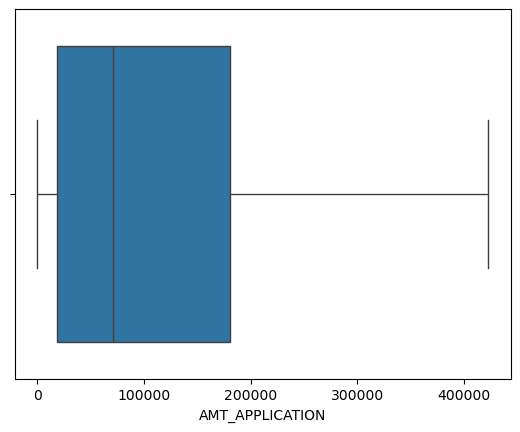

In [423]:
# Create a box plot to visualize the distribution of 'AMT_APPLICATION' after clipping outliers.
sns.boxplot(x=num_df1['AMT_APPLICATION'])
plt.show()  # Display the plot.

In [424]:
# Generate descriptive statistics for the 'AMT_CREDIT' column in the 'num_df' DataFrame.
num_df1.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

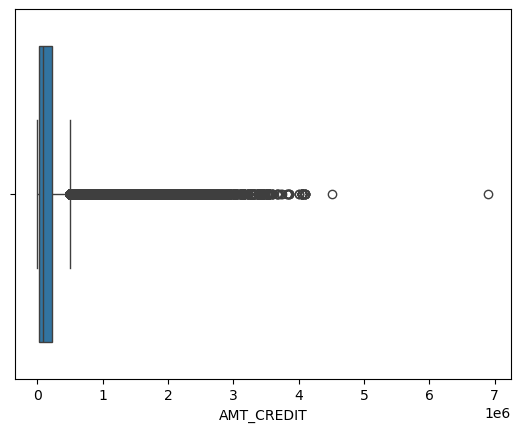

In [425]:
# Create a box plot to visualize the distribution and potential outliers in 'AMT_CREDIT'.
sns.boxplot(x=num_df1['AMT_CREDIT'])
plt.show()  # Display the plot.

In [426]:
# Calculate the first quartile (Q1) of 'AMT_CREDIT'.
Q1 = num_df1['AMT_CREDIT'].quantile(0.25)
# Calculate the third quartile (Q3) of 'AMT_CREDIT'.
Q3 = num_df1['AMT_CREDIT'].quantile(0.75)
# Calculate the interquartile range (IQR).
IQR = Q3 - Q1
# Calculate the lower and upper limits for outlier removal.
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Clip values in 'AMT_CREDIT' to be within the calculated limits.
num_df1['AMT_CREDIT'] = np.clip(num_df1['AMT_CREDIT'], lower_limit, upper_limit)

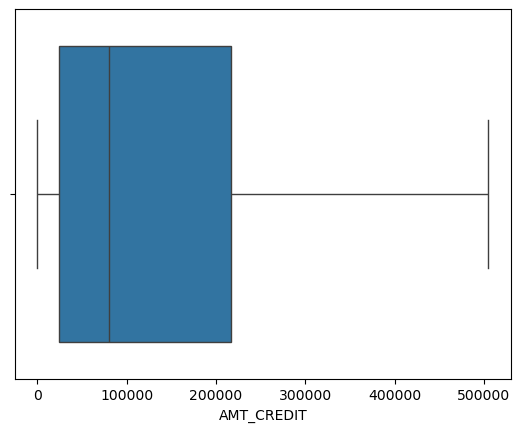

In [427]:
# Create a box plot to visualize the distribution of 'AMT_CREDIT' after clipping outliers.
sns.boxplot(x=num_df1['AMT_CREDIT'])
plt.show()  # Display the plot.

In [428]:
# Generate descriptive statistics for the 'AMT_GOODS_PRICE' column in the 'num_df' DataFrame.
num_df1.AMT_GOODS_PRICE.describe()

count    1.670214e+06
mean     2.011815e+05
std      2.808629e+05
min      0.000000e+00
25%      6.750000e+04
50%      1.123200e+05
75%      1.804050e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

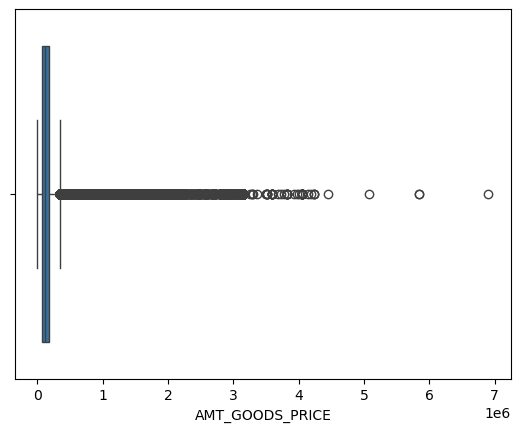

In [429]:
# Create a box plot to visualize the distribution and potential outliers in 'AMT_GOODS_PRICE'.
sns.boxplot(x=num_df1['AMT_GOODS_PRICE'])
plt.show()  # Display the plot.

In [430]:
# Calculate the first quartile (Q1) of 'AMT_GOODS_PRICE'.
Q1 = num_df1['AMT_GOODS_PRICE'].quantile(0.25)
# Calculate the third quartile (Q3) of 'AMT_GOODS_PRICE'.
Q3 = num_df1['AMT_GOODS_PRICE'].quantile(0.75)
# Calculate the interquartile range (IQR).
IQR = Q3 - Q1
# Calculate the lower and upper limits for outlier removal.
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Clip values in 'AMT_GOODS_PRICE' to be within the calculated limits.
num_df1['AMT_GOODS_PRICE'] = np.clip(num_df1['AMT_GOODS_PRICE'], lower_limit, upper_limit)

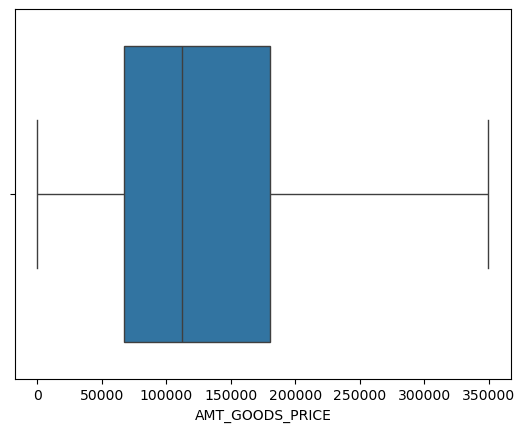

In [431]:
# Create a box plot to visualize the distribution of 'AMT_GOODS_PRICE' after clipping outliers.
sns.boxplot(x=num_df1['AMT_GOODS_PRICE'])
plt.show()  # Display the plot.

In [432]:
# Generate descriptive statistics for the 'DAYS_DECISION' column in the 'num_df' DataFrame.
num_df1.DAYS_DECISION.describe()

count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64

In [433]:
# Convert 'DAYS_DECISION' to string, remove potential leading '-' and convert to float.
num_df1['DAYS_DECISION'] = num_df1['DAYS_DECISION'].astype(str).str.replace('-', '')
num_df1['DAYS_DECISION']=num_df1.DAYS_DECISION.astype(float)

In [434]:
# Print the data type of the 'DAYS_DECISION' column.
print(num_df1['DAYS_DECISION'].dtype)

float64


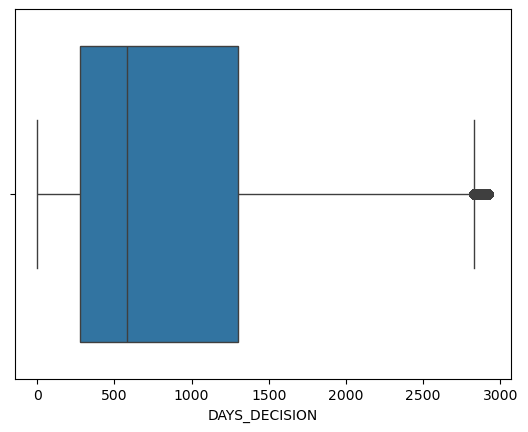

In [435]:
# Create a box plot to visualize the distribution and potential outliers in 'DAYS_DECISION'.
sns.boxplot(x=num_df1['DAYS_DECISION'])
plt.show()  # Display the plot.

In [436]:
# Calculate the first quartile (Q1) of 'DAYS_DECISION'.
Q1 = num_df1['DAYS_DECISION'].quantile(0.25)
# Calculate the third quartile (Q3) of 'DAYS_DECISION'.
Q3 = num_df1['DAYS_DECISION'].quantile(0.75)
# Calculate the interquartile range (IQR).
IQR = Q3 - Q1
# Calculate the lower and upper limits for outlier removal.
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Clip values in 'DAYS_DECISION' to be within the calculated limits.
num_df1['DAYS_DECISION'] = np.clip(num_df1['DAYS_DECISION'], lower_limit, upper_limit)

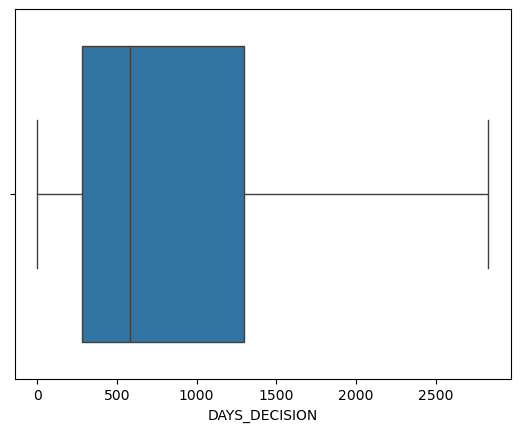

In [437]:
# Create a box plot to visualize the distribution of 'DAYS_DECISION' after clipping outliers.
sns.boxplot(x=num_df1['DAYS_DECISION'])
plt.show()  # Display the plot.

In [438]:
num_df1.head()

,NAME_CONTRACT_STATUS,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION
0,Approved,1730.43000,17145.0,17145.0,17145.0,73.0
1,Approved,25188.61500,422820.0,504805.5,349762.5,164.0
2,Approved,15060.73500,112500.0,136444.5,112500.0,301.0
3,Approved,30739.42125,422820.0,470790.0,349762.5,512.0
4,Refused,30739.42125,337500.0,404055.0,337500.0,781.0


In [439]:
num_df1=num_df1.drop(num_df1.columns[0],axis=1)

In [440]:
num_df1.head()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION
0,1730.43000,17145.0,17145.0,17145.0,73.0
1,25188.61500,422820.0,504805.5,349762.5,164.0
2,15060.73500,112500.0,136444.5,112500.0,301.0
3,30739.42125,422820.0,470790.0,349762.5,512.0
4,30739.42125,337500.0,404055.0,337500.0,781.0


In [441]:
prev_app_df1 = pd.concat([cata_df1, num_df1], axis=1)

In [442]:
prev_app_df1.head()

,NAME_CONTRACT_STATUS,NAME_CONTRACT_TYPE,NFLAG_LAST_APPL_IN_DAY,WEEKDAY_APPR_PROCESS_START,NAME_PAYMENT_TYPE,NAME_PORTFOLIO,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION
0,Approved,Consumer loans,Yes,SATURDAY,Cash through the bank,POS,1730.43000,17145.0,17145.0,17145.0,73.0
1,Approved,Cash loans,Yes,THURSDAY,Cash through the bank,Cash,25188.61500,422820.0,504805.5,349762.5,164.0
2,Approved,Cash loans,Yes,TUESDAY,Cash through the bank,Cash,15060.73500,112500.0,136444.5,112500.0,301.0
3,Approved,Cash loans,Yes,MONDAY,Cash through the bank,Cash,30739.42125,422820.0,470790.0,349762.5,512.0
4,Refused,Cash loans,Yes,THURSDAY,Cash through the bank,Cash,30739.42125,337500.0,404055.0,337500.0,781.0


In [443]:
prev_app_df1.shape

(1670214, 11)

In [444]:
data1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [445]:
prev_app_df1 = pd.concat([data1['SK_ID_CURR'], prev_app_df1], axis=1)

In [446]:
prev_app_df1.head()

,SK_ID_CURR,NAME_CONTRACT_STATUS,NAME_CONTRACT_TYPE,NFLAG_LAST_APPL_IN_DAY,WEEKDAY_APPR_PROCESS_START,NAME_PAYMENT_TYPE,NAME_PORTFOLIO,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION
0,271877,Approved,Consumer loans,Yes,SATURDAY,Cash through the bank,POS,1730.43000,17145.0,17145.0,17145.0,73.0
1,108129,Approved,Cash loans,Yes,THURSDAY,Cash through the bank,Cash,25188.61500,422820.0,504805.5,349762.5,164.0
2,122040,Approved,Cash loans,Yes,TUESDAY,Cash through the bank,Cash,15060.73500,112500.0,136444.5,112500.0,301.0
3,176158,Approved,Cash loans,Yes,MONDAY,Cash through the bank,Cash,30739.42125,422820.0,470790.0,349762.5,512.0
4,202054,Refused,Cash loans,Yes,THURSDAY,Cash through the bank,Cash,30739.42125,337500.0,404055.0,337500.0,781.0


In [447]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,Age,Employment_length
0,100002,Yes,Cash loans,M,N,Y,Working,202500.0,406597.5,24700.5,25.902806,1.744011
1,100003,No,Cash loans,F,N,N,State servant,270000.0,1293502.5,35698.5,45.900068,3.252567
2,100004,No,Revolving loans,M,Y,Y,Working,67500.0,135000.0,6750.0,52.145106,0.616016
3,100006,No,Cash loans,F,N,Y,Working,135000.0,312682.5,29686.5,52.032854,8.320329
4,100007,No,Cash loans,M,N,Y,Working,121500.0,513000.0,21865.5,54.570842,8.317591


In [635]:
merged_df = app_df.merge(prev_app_df1, how='left', on='SK_ID_CURR')


In [643]:
merged_df.shape

(1430155, 23)

In [637]:
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CONTRACT_TYPE_y,NFLAG_LAST_APPL_IN_DAY,WEEKDAY_APPR_PROCESS_START,NAME_PAYMENT_TYPE,NAME_PORTFOLIO,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE,DAYS_DECISION
0,100002,Yes,Cash loans,M,N,Y,Working,202500.0,406597.5,24700.5,...,Consumer loans,Yes,SATURDAY,Cash through the bank,POS,9251.77500,179055.0,179055.0,179055.0,606.0
1,100003,No,Cash loans,F,N,N,State servant,270000.0,1293502.5,35698.5,...,Cash loans,Yes,FRIDAY,Cash through the bank,Cash,30739.42125,422820.0,504805.5,349762.5,746.0
2,100003,No,Cash loans,F,N,N,State servant,270000.0,1293502.5,35698.5,...,Consumer loans,Yes,SUNDAY,Cash through the bank,POS,30739.42125,337500.0,348637.5,337500.0,828.0
3,100003,No,Cash loans,F,N,N,State servant,270000.0,1293502.5,35698.5,...,Consumer loans,Yes,SATURDAY,Cash through the bank,POS,6737.31000,68809.5,68053.5,68809.5,2341.0
4,100004,No,Revolving loans,M,Y,Y,Working,67500.0,135000.0,6750.0,...,Consumer loans,Yes,FRIDAY,Cash through the bank,POS,5357.25000,24282.0,20106.0,24282.0,815.0


In [639]:
merged_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'Age',
       'Employment_length', 'NAME_CONTRACT_STATUS', 'NAME_CONTRACT_TYPE_y',
       'NFLAG_LAST_APPL_IN_DAY', 'WEEKDAY_APPR_PROCESS_START',
       'NAME_PAYMENT_TYPE', 'NAME_PORTFOLIO', 'AMT_ANNUITY_y',
       'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE', 'DAYS_DECISION'],
      dtype='object')

Segmented Univariate analysis on the merged dataframe focusing on TARGET

In [695]:
cat_cols=merged_df[['NAME_CONTRACT_TYPE_x','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','DAYS_DECISION','NAME_CONTRACT_STATUS','NAME_CONTRACT_TYPE_y','NFLAG_LAST_APPL_IN_DAY','WEEKDAY_APPR_PROCESS_START','NAME_PAYMENT_TYPE','NAME_PORTFOLIO']]

In [699]:
num_cols=merged_df[['AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x','Age','Employment_length','AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y','AMT_GOODS_PRICE','DAYS_DECISION']]

In [701]:
num_cols.shape

(1430155, 10)

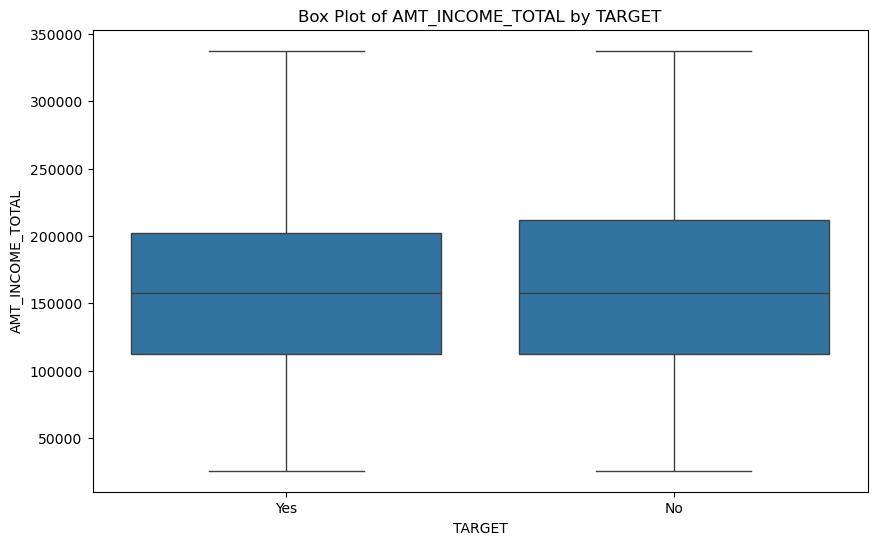

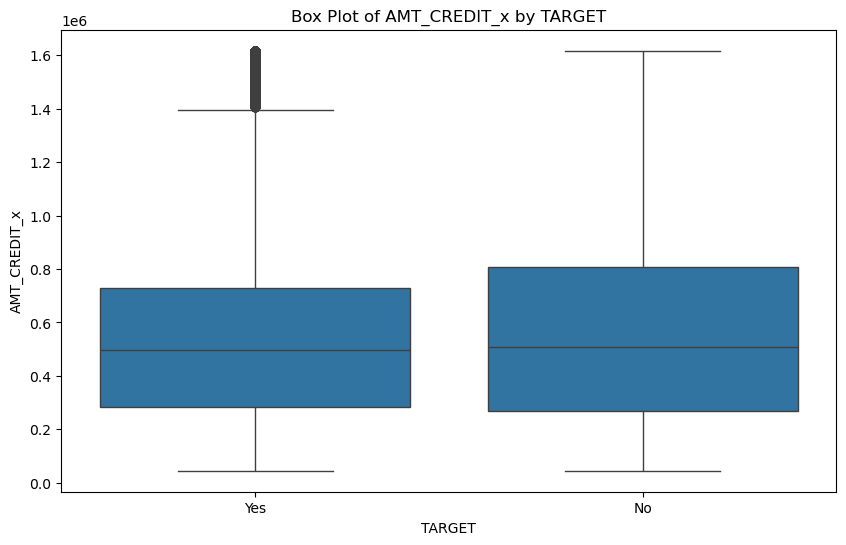

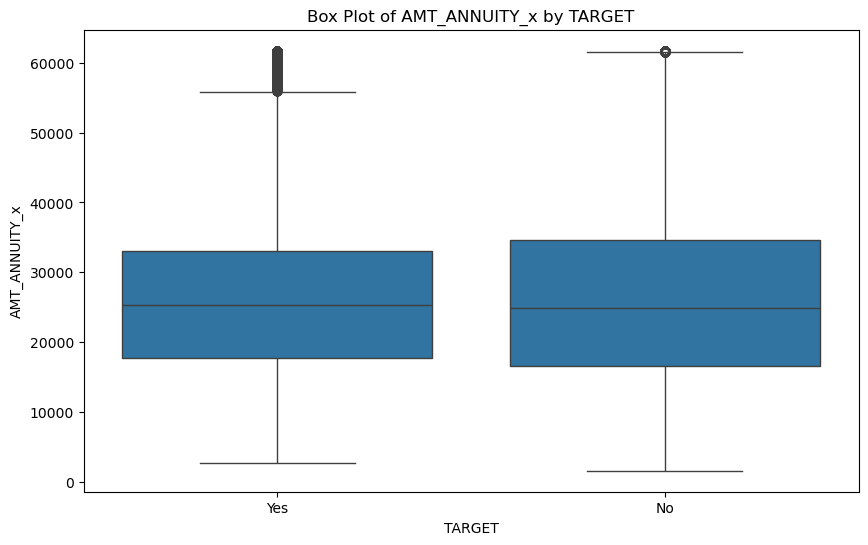

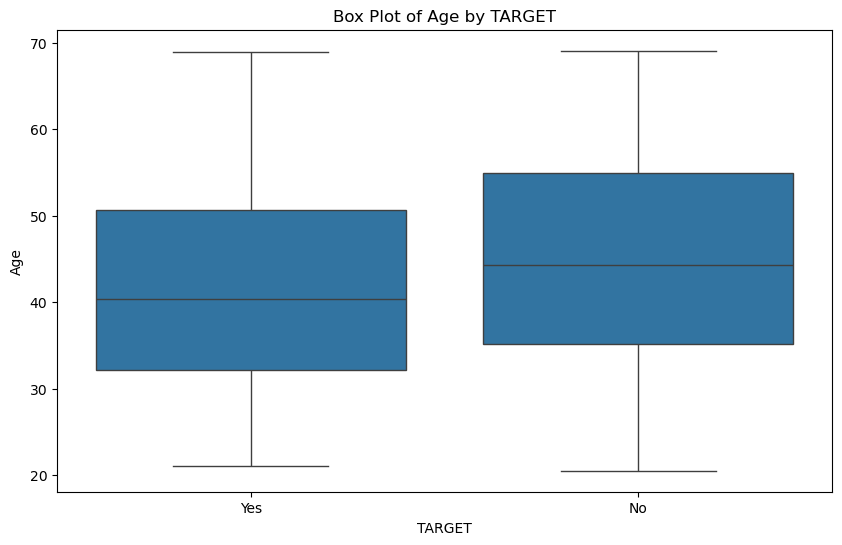

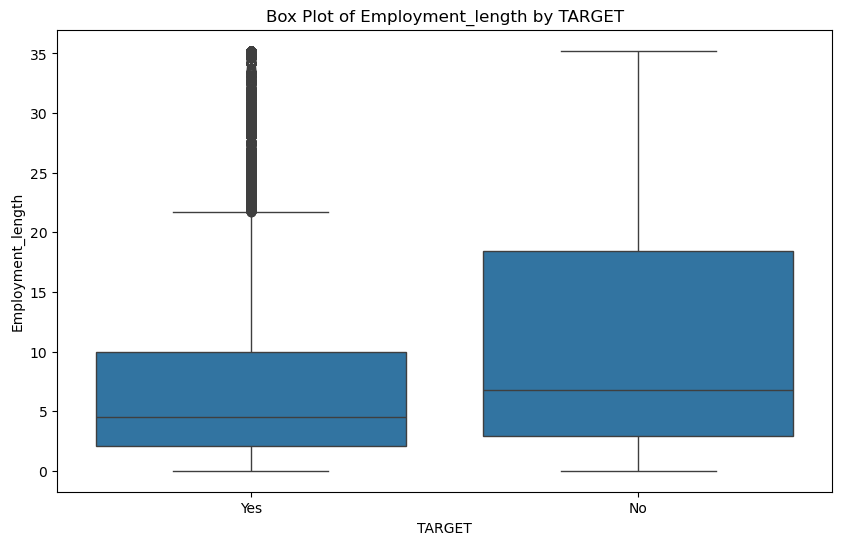

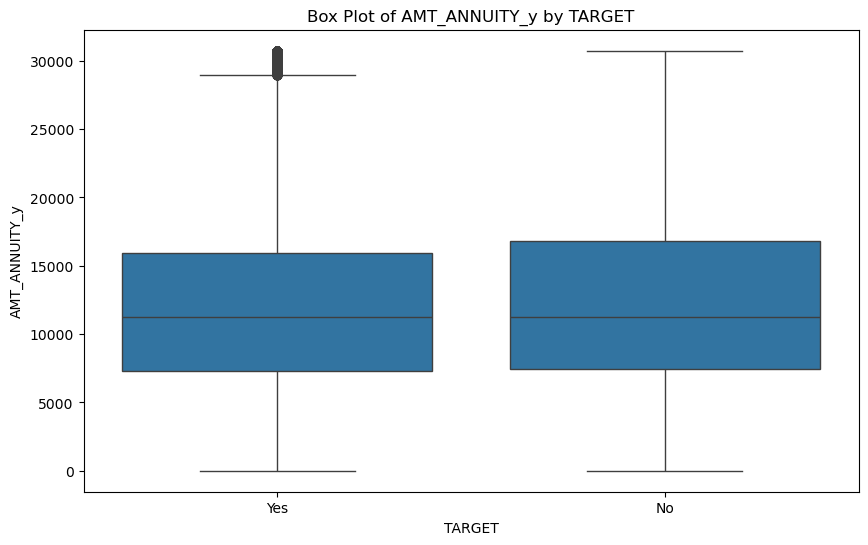

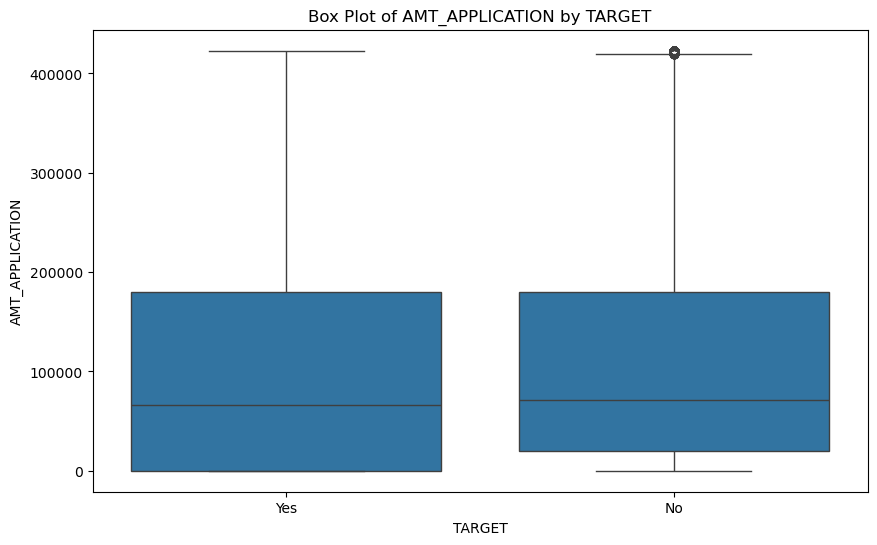

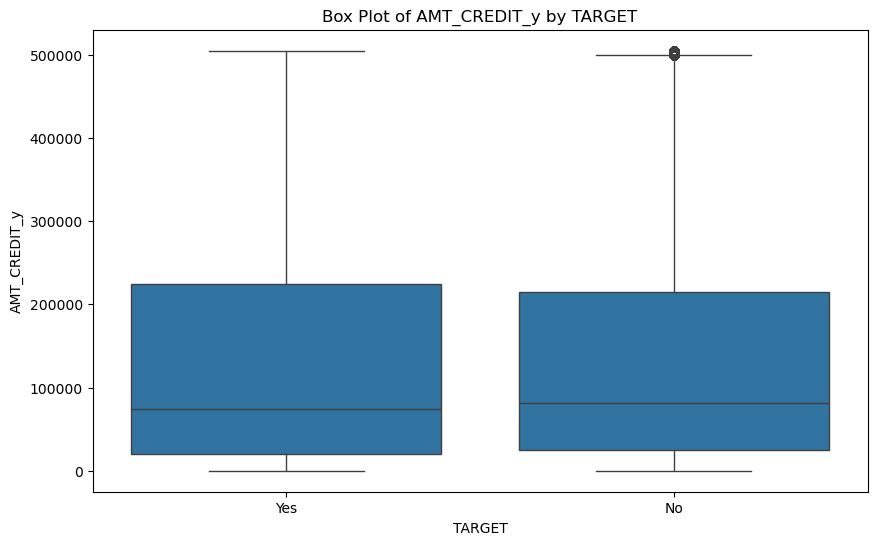

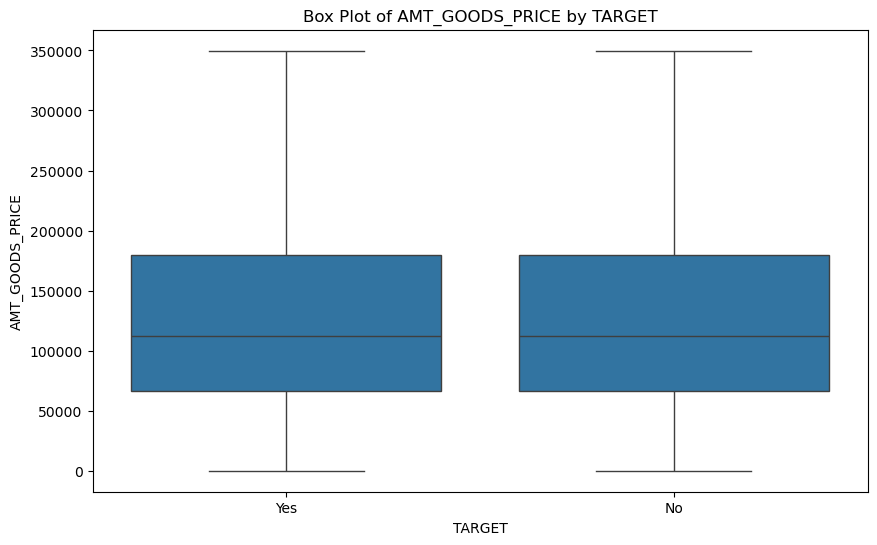

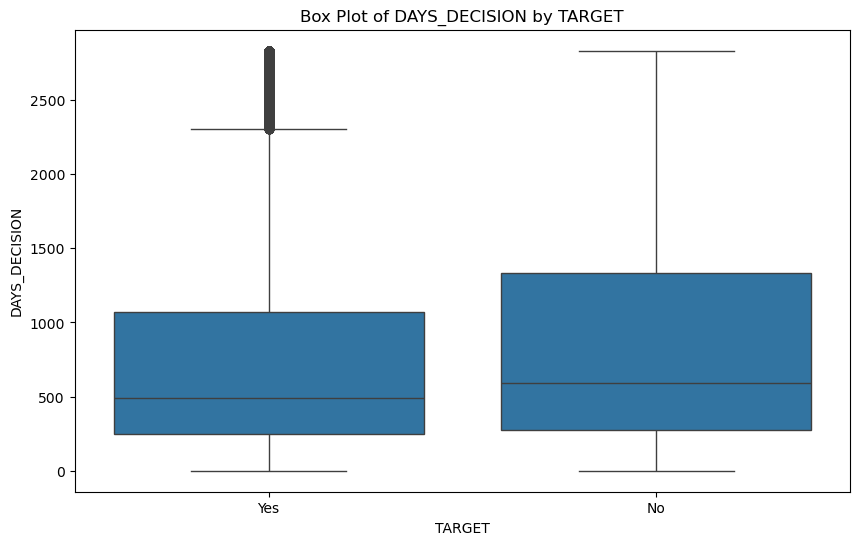

In [703]:
# Loop over each column in the list
for column in num_cols:
    # Set the figure size for the plot
    plt.figure(figsize=(10, 6))
    
    # Create a box plot with TARGET on the x-axis and the current column on the y-axis
    sns.boxplot(x='TARGET', y=column, data=merged_df)
    
    # Set the title for the plot
    plt.title(f'Box Plot of {column} by TARGET')
    
    # Display the plot
    plt.show()

Based on the box plots presented, a potential hypothesis could be:

**"There appears to be a significant difference in financial indicators such as income, credit amounts, and annuities between those who defaulted (TARGET = Yes) and those who did not (TARGET = No). Specifically, individuals who did not default generally have higher incomes and credit amounts, suggesting that higher financial stability is associated with lower default rates."**

This hypothesis could be tested further with statistical analysis to confirm whether these observed differences are statistically significant.

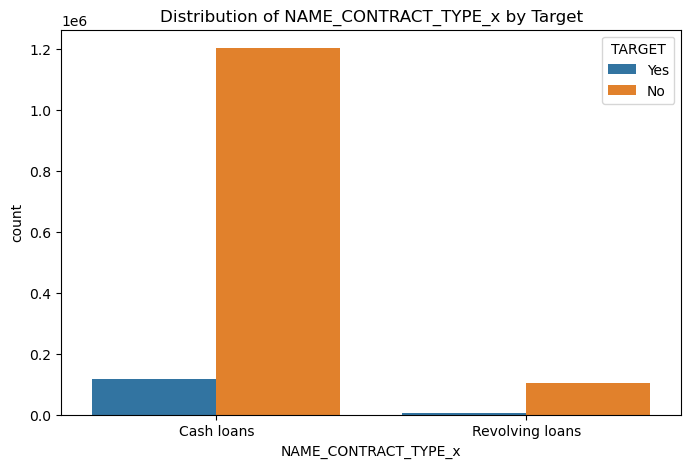

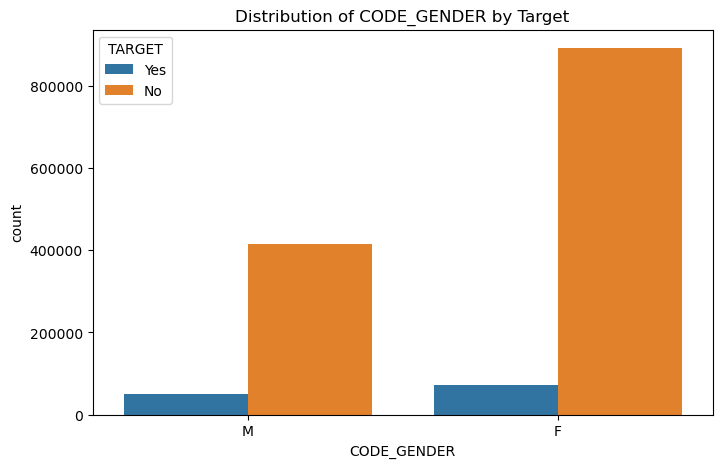

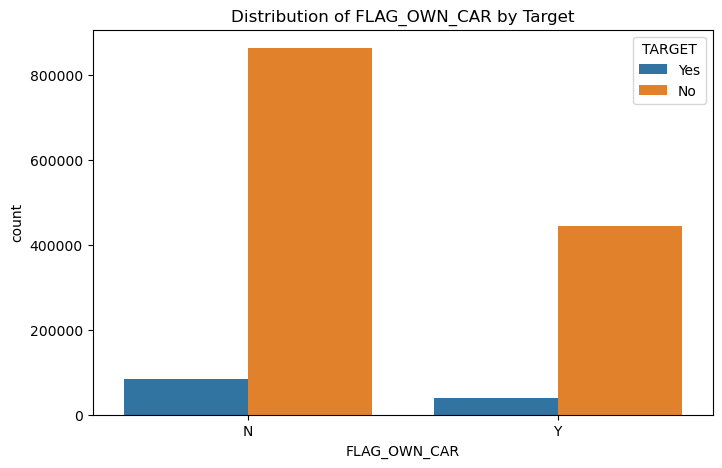

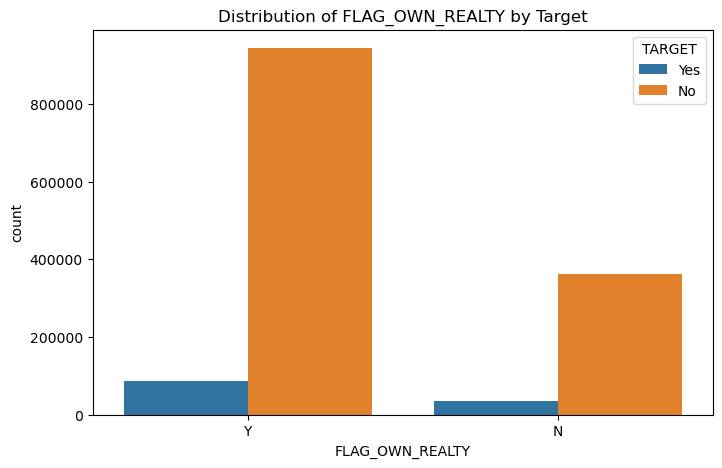

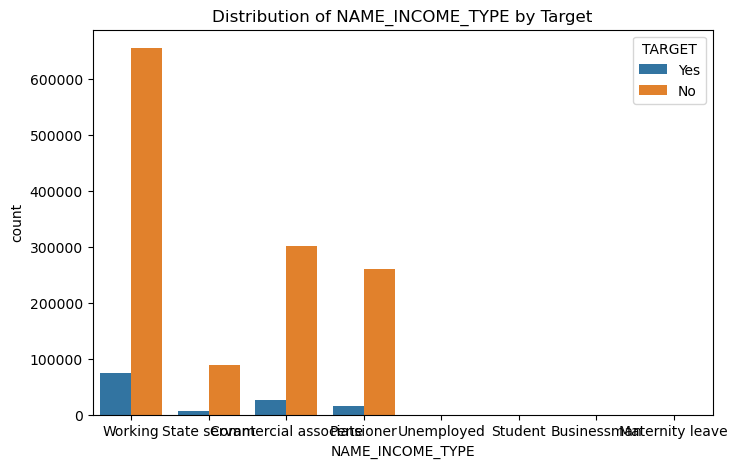

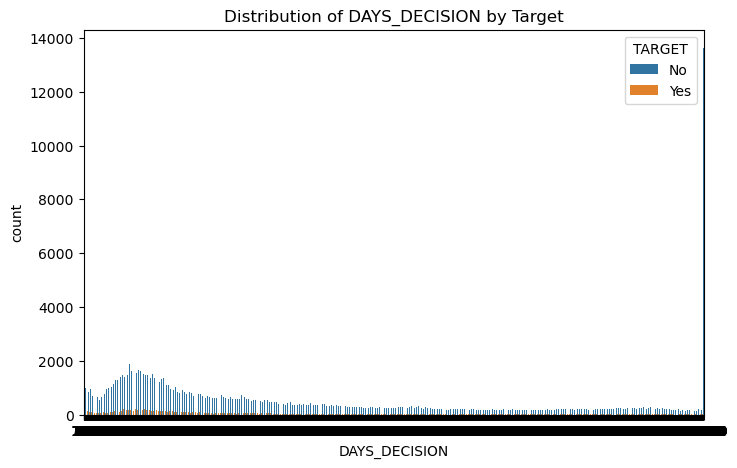

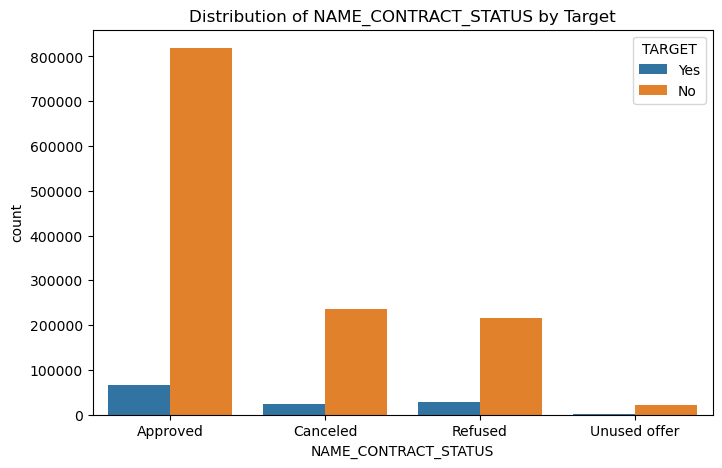

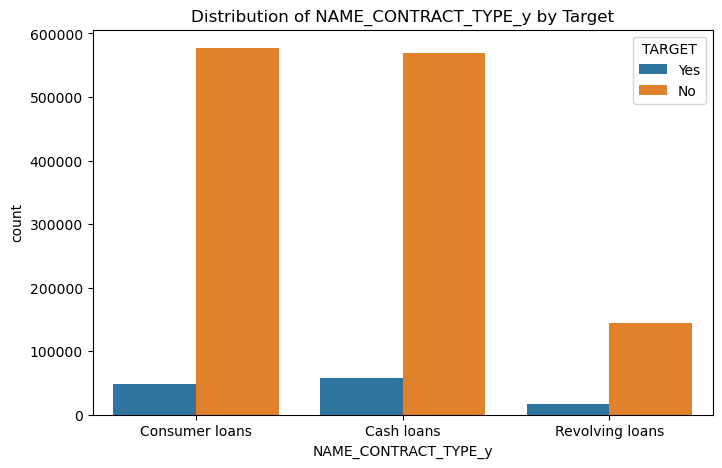

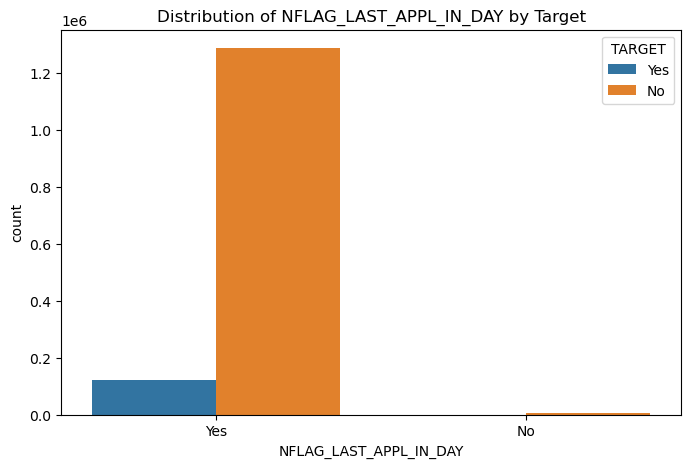

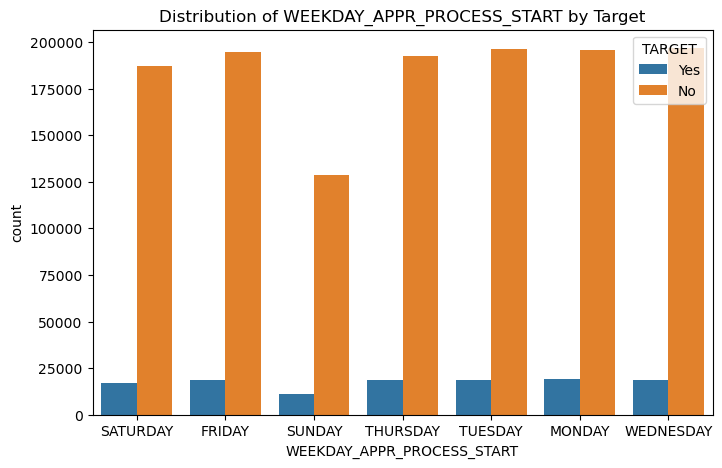

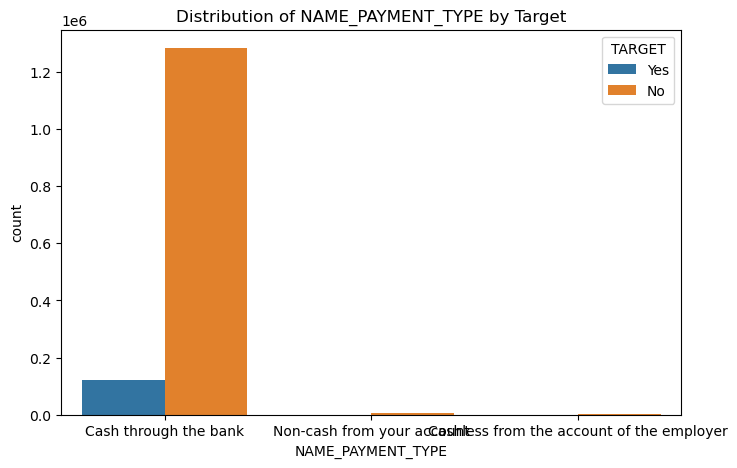

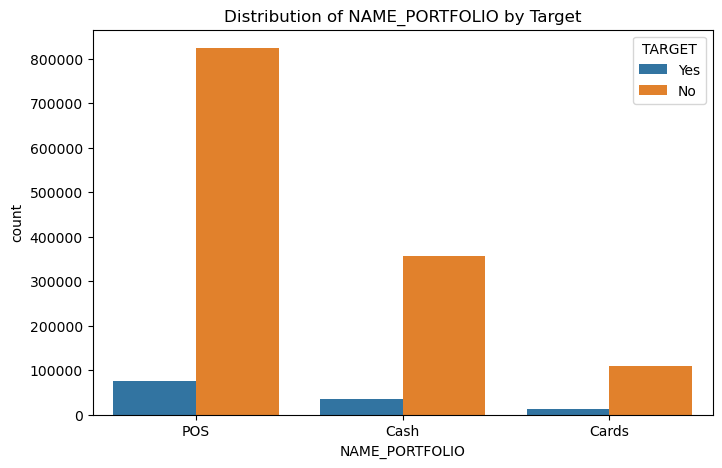

In [705]:
# Loop over each column in the list
for column in cat_cols:
    # Set the figure size for the plot
    plt.figure(figsize=(8, 5))
    
    # Create a count plot with the current column on the x-axis and TARGET as the hue
    sns.countplot(x=column, hue='TARGET', data=merged_df)
    
    # Set the title for the plot
    plt.title(f'Distribution of {column} by Target')
    
    # Display the plot
    plt.show()

Based on the count plots above, the following hypothesis can be formulated:

**"Demographic and financial characteristics, such as the type of contract, gender, and asset ownership, show noticeable variations between those who defaulted on loans (TARGET = Yes) and those who did not (TARGET = No). For instance, certain contract types like cash loans and specific income categories such as working individuals appear to have a higher concentration among defaulters. Similarly, gender and ownership of assets like cars and real estate may also influence default rates. These observations suggest that these factors could be significant predictors of credit risk, and further statistical analysis is needed to confirm their predictive power."**

This hypothesis points to the potential of using these categorical variables as predictors in credit risk models and warrants a more detailed investigation to understand their impact on default rates.nds.